I have tried to apply the algorithm on the sample image ( which I took from google earth ).

In the provided exaple the results are not so improved as RGB scale as well as cordinate data both are in the same domain so ideally we dont need to apply multi level clustering and merging. But I am providing a brief over-view of the approach on which I have worked while working as Data Scietist at IMD. I cant share to detailed results because of NDA. I am atteching some results of my original work here.




###  Converted image of satelite data.
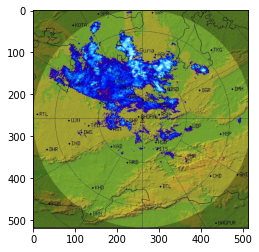

### Image after first Clustering

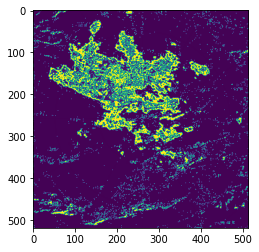

### Results after 2 level of clustering

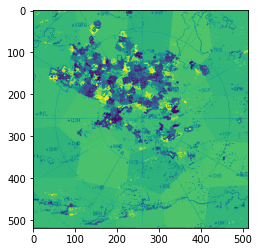



### Results after merging

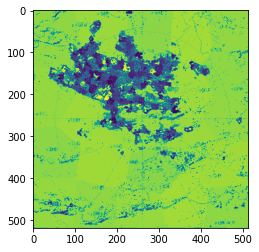


# **Improved Unsupervised Multi-level Clustering for Segmentation of Remote Sensing Imageries Containing Embedded Objects**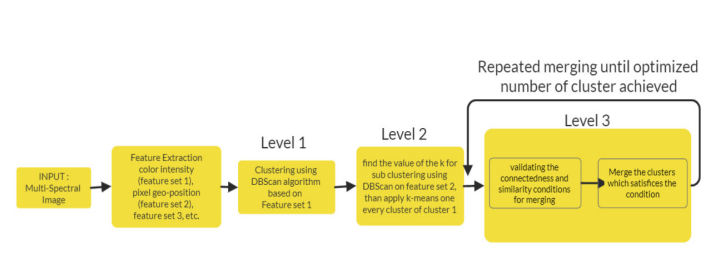

task flow of proposed multi-level unsupervised clustering method

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

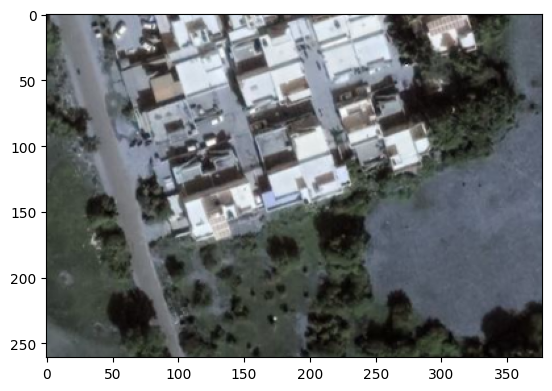

In [ ]:
img=cv2.imread('/content/small_Screenshot_1.png')
plt.imshow(img)

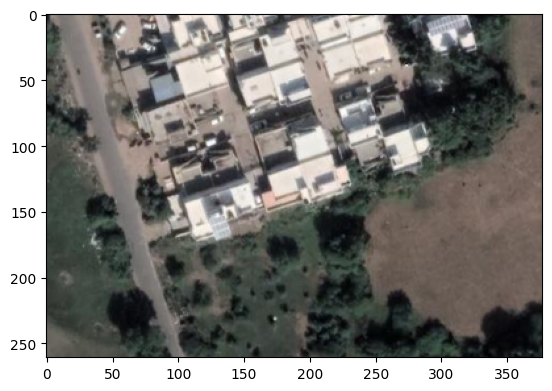

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
scaler = MinMaxScaler()
img=img.reshape((img.shape[1]*img.shape[0],3))
img = pd.DataFrame(img)
scalled_image = scaler.fit_transform(img)

In [ ]:

x = []
y = []

for i in range(261):
  for j in range(377):
    x.append(i)
    y.append(j)
img['x'] = x
img['y'] = y

In [ ]:
scalled_image = pd.DataFrame(scalled_image)

In [ ]:
scalled_image['x'] = x
scalled_image['y'] = y

In [ ]:
scalled_image

0         1         2    x    y
0      0.117647  0.106299  0.118110    0    0
1      0.160784  0.137795  0.153543    0    1
2      0.282353  0.259843  0.267717    0    2
3      0.486275  0.456693  0.460630    0    3
4      0.568627  0.531496  0.527559    0    4
...         ...       ...       ...  ...  ...
98392  0.133333  0.153543  0.169291  260  372
98393  0.137255  0.157480  0.173228  260  373
98394  0.121569  0.141732  0.153543  260  374
98395  0.121569  0.149606  0.153543  260  375
98396  0.176471  0.212598  0.204724  260  376

[98397 rows x 5 columns]

In [ ]:
scalled_image.to_csv("Scalled_image.csv",index=False)

### kmeans First level

In [ ]:
selected_features = [0,1,2]
df_selected = scalled_image[selected_features]

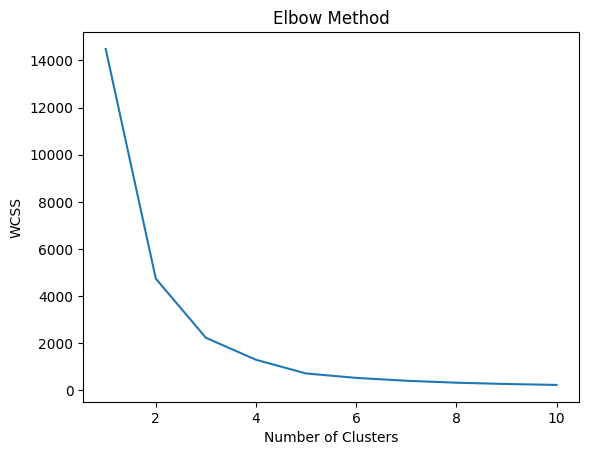

In [ ]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 2 2 2]


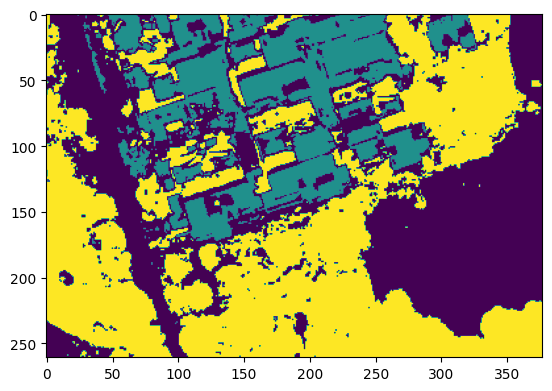

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

k_means_prediction = kmean.fit_predict(df_selected)
print(k_means_prediction)
plt.imshow(np.uint8(k_means_prediction.reshape(261,377)))

### Level 1 clustering

In [ ]:
from sklearn.cluster import DBSCAN,KMeans
db = DBSCAN(eps=0.1, min_samples=5)
kmean = KMeans(n_clusters=5)
Y_prediction = db.fit_predict(img[[0,1,2]])

Y_prediction

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
print(max(Y_prediction))

3613


In [ ]:
img['1st_level'] = Y_prediction

#### plot of -1 index elements

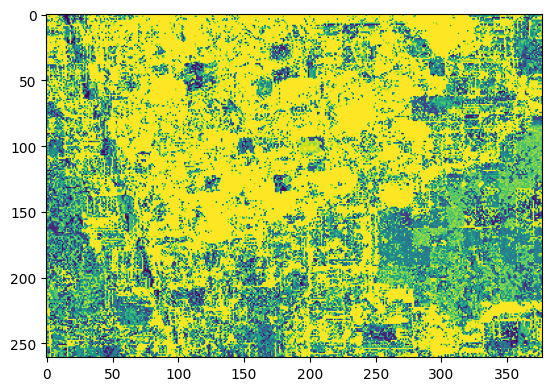

48806


In [ ]:
plt.imshow(np.uint8(Y_prediction.reshape(261,377)))
plt.show()
print(list(Y_prediction).count(-1))

[48806     9    26 ...     9    15     8]


Text(0, 0.5, 'Count')

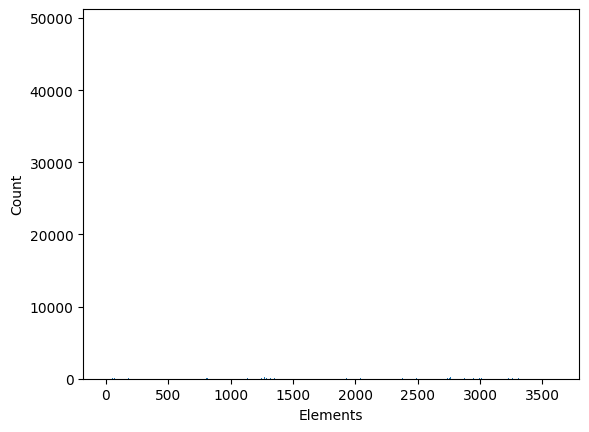

In [ ]:
graph_data = np.array(img['1st_level'])
unique_elements, counts = np.unique(graph_data, return_counts=True)
print(counts)
plt.bar(unique_elements, counts, align='center')
plt.xlabel('Elements')
plt.ylabel('Count')

In [ ]:
img['scalled_kmeans'] = k_means_prediction
print(img)

         0    1    2    x    y  1st_level  scalled_kmeans
0       30   27   30    0    0         -1               2
1       41   35   39    0    1         -1               2
2       72   66   68    0    2         -1               2
3      124  116  117    0    3         -1               0
4      145  135  134    0    4         -1               0
...    ...  ...  ...  ...  ...        ...             ...
98392   34   39   43  260  372         -1               2
98393   35   40   44  260  373       2642               2
98394   31   36   39  260  374         -1               2
98395   31   38   39  260  375         -1               2
98396   45   54   52  260  376         -1               2

[98397 rows x 7 columns]


In [ ]:
img = pd.DataFrame(img)

### Level 2 Clustering

<ipython-input-71-707e01cef039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result


custer 0 with 39298 data points sub-cluster into == 219


<ipython-input-71-707e01cef039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result


custer 1 with 17109 data points sub-cluster into == 51


<ipython-input-71-707e01cef039>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result


custer 2 with 41990 data points sub-cluster into == 68
         0    1    2    x    y  1st_level  scalled_kmeans  kmenas_2nd_level  \
0       30   27   30    0    0         -1               2               NaN   
1       41   35   39    0    1         -1               2               NaN   
2       72   66   68    0    2         -1               2               NaN   
3      124  116  117    0    3         -1               0               NaN   
4      145  135  134    0    4         -1               0               NaN   
...    ...  ...  ...  ...  ...        ...             ...               ...   
98392   34   39   43  260  372         -1               2               NaN   
98393   35   40   44  260  373       2642               2               NaN   
98394   31   36   39  260  374         -1               2               NaN   
98395   31   38   39  260  375         -1               2               NaN   
98396   45   54   52  260  376         -1               2               NaN 

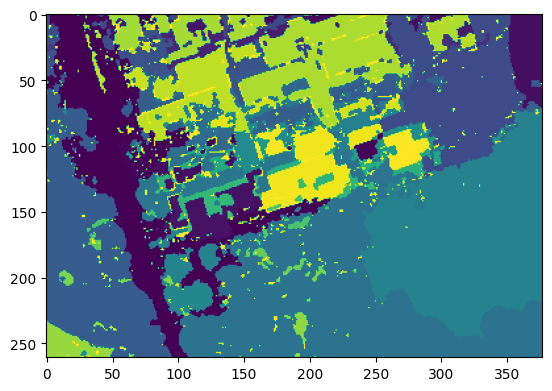

[ 3151 10729    84     9     8    50    22   122    68     7  1488    62
    64    10    10   105    14    19    11    91   104    10    14     8
     7     8   459    13   119     7    19    66     6    43    87    11
     7    20     7    19    10     7    12     7    55    34     9     7
    12    21    12     7    16    65    15    45   164   122    42  7578
    43    43   135   101   619    37   141   324    28    23    30   413
    43   244    35  9349   271   208   689    87    80    91   165    26
   191   154    24    37    57    24    59    38   490    31    23   390
    52    26 17320   423    25  1056    35    62    81    48    66    23
    99    79    49   599   100    58 14957   245   435    28   159   714
    54    22   129    11   520   142     8     6    74     9     7     7
     4     7    32    37    10    34    77   150     9     6     5    17
    11    14    10    16    21    18    34    35    14    54    15     8
    10   119     7   103    98   149    34    14   

Text(0, 0.5, 'Count')

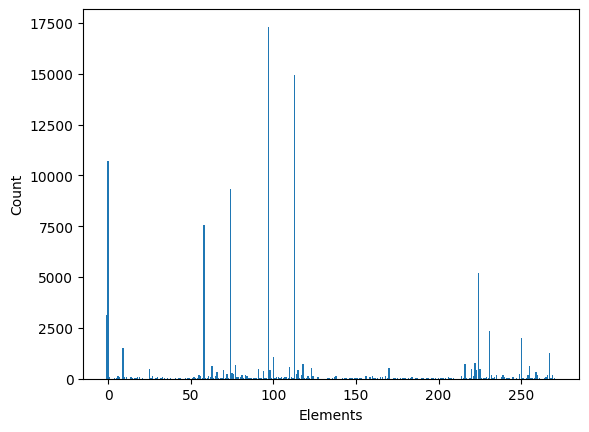

In [ ]:
# 2 level on kmeans results
second_level_clusters = 0


max_cluster = 0
for i in range(0,3):
  temp = img[img['scalled_kmeans'] == i]
  db = DBSCAN(eps=1.5, min_samples=7)
  temp_result = db.fit_predict(temp[['x','y']])
  temp['results'] = temp_result
  if(max_cluster > max(temp_result)):
    max_cluster = max(temp_result)
  print(f"custer {i} with {len(temp_result)} data points sub-cluster into == {max(temp_result)}")
  # for i in range(len(temp_result)):
  #   if(temp_result[i]!=-1):
  #     temp_result[i] = second_level_clusters + temp_result[i]
  # img.loc[temp_result.index , '2nd_level'] = temp_result
  img.loc[temp[temp_result == -1].index, 'kmeans_2nd_level'] = -1
  for j in range(max(temp_result) +1):
      img.loc[temp[temp_result == j].index, 'kmeans_2nd_level'] = second_level_clusters
      second_level_clusters += 1
  second_level_clusters = max(temp_result)+1



print(img)
# print("max_cluster=", max_cluster)
print("max_cluster=" , max(img['kmeans_2nd_level']))

plt.imshow(np.uint8(np.array(img['kmeans_2nd_level']).reshape(261,377)))
plt.show()
data = np.array(img['kmeans_2nd_level'])
unique_elements, counts = np.unique(data, return_counts=True)
print(counts)
plt.bar(unique_elements, counts, align='center')
plt.xlabel('Elements')
plt.ylabel('Count')

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer -1 with 48806 data points sub-cluster into == 112
custer 0 with 9 data points sub-cluster into == -1
custer 1 with 26 data points sub-cluster into == 2
custer 2 with 39 data points sub-cluster into == 2
custer 3 with 24 data points sub-cluster into == 1
custer 4 with 44 data points sub-cluster into == 6
custer 5 with 19 data points sub-cluster into == 0
custer 6 with 10 data points sub-cluster into == -1
custer 7 with 6 data points sub-cluster into == 0
custer 8 with 8 data points sub-cluster into == 0
custer 9 with 8 data points sub-cluster into == -1
custer 10 with 5 data points sub-cluster into == -1
custer 11 with 8 data points sub-cluster into == -1
custer 12 with 6 data points sub-cluster into == 0
custer 13 with 7 data points sub-cluster into == -1
custer 14 with 14 data points sub-cluster into == 0
custer 15 with 12 data points sub-cluster into == -1
custer 16 with 8 data points sub-cluster into == -1
custer 17 with 6 data points sub-cluster into == 0


<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 18 with 9 data points sub-cluster into == 0
custer 19 with 5 data points sub-cluster into == -1
custer 20 with 8 data points sub-cluster into == -1
custer 21 with 11 data points sub-cluster into == -1
custer 22 with 10 data points sub-cluster into == -1
custer 23 with 16 data points sub-cluster into == 0
custer 24 with 8 data points sub-cluster into == -1
custer 25 with 8 data points sub-cluster into == 0
custer 26 with 5 data points sub-cluster into == -1
custer 27 with 6 data points sub-cluster into == -1
custer 28 with 8 data points sub-cluster into == 0
custer 29 with 11 data points sub-cluster into == 0
custer 30 with 5 data points sub-cluster into == -1
custer 31 with 6 data points sub-cluster into == -1
custer 32 with 6 data points sub-cluster into == -1
custer 33 with 16 data points sub-cluster into == 0
custer 34 with 67 data points sub-cluster into == 4
custer 35 with 6 data points sub-cluster into == 0
custer 36 with 5 data points sub-cluster into == -1
custer 37 with

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 52 with 13 data points sub-cluster into == 0
custer 53 with 33 data points sub-cluster into == -1
custer 54 with 28 data points sub-cluster into == 0
custer 55 with 25 data points sub-cluster into == 1
custer 56 with 26 data points sub-cluster into == 0
custer 57 with 25 data points sub-cluster into == 0
custer 58 with 19 data points sub-cluster into == 0
custer 59 with 16 data points sub-cluster into == -1
custer 60 with 22 data points sub-cluster into == 0
custer 61 with 17 data points sub-cluster into == 0
custer 62 with 17 data points sub-cluster into == -1
custer 63 with 12 data points sub-cluster into == -1
custer 64 with 5 data points sub-cluster into == -1
custer 65 with 7 data points sub-cluster into == 0
custer 66 with 10 data points sub-cluster into == 0
custer 67 with 15 data points sub-cluster into == 0
custer 68 with 9 data points sub-cluster into == -1
custer 69 with 47 data points sub-cluster into == 2
custer 70 with 29 data points sub-cluster into == 0
custer 71

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 84 with 6 data points sub-cluster into == -1
custer 85 with 5 data points sub-cluster into == -1
custer 86 with 11 data points sub-cluster into == 0
custer 87 with 13 data points sub-cluster into == 0
custer 88 with 6 data points sub-cluster into == -1
custer 89 with 5 data points sub-cluster into == -1
custer 90 with 11 data points sub-cluster into == 0
custer 91 with 10 data points sub-cluster into == -1
custer 92 with 6 data points sub-cluster into == -1
custer 93 with 10 data points sub-cluster into == -1
custer 94 with 5 data points sub-cluster into == -1
custer 95 with 6 data points sub-cluster into == -1
custer 96 with 6 data points sub-cluster into == -1
custer 97 with 7 data points sub-cluster into == 0
custer 98 with 6 data points sub-cluster into == -1
custer 99 with 5 data points sub-cluster into == 0
custer 100 with 6 data points sub-cluster into == -1
custer 101 with 5 data points sub-cluster into == -1
custer 102 with 8 data points sub-cluster into == -1
custer 10

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 118 with 11 data points sub-cluster into == 1
custer 119 with 23 data points sub-cluster into == 1
custer 120 with 34 data points sub-cluster into == 5
custer 121 with 38 data points sub-cluster into == 1
custer 122 with 34 data points sub-cluster into == 0
custer 123 with 31 data points sub-cluster into == 0
custer 124 with 10 data points sub-cluster into == 0
custer 125 with 10 data points sub-cluster into == -1
custer 126 with 12 data points sub-cluster into == -1
custer 127 with 5 data points sub-cluster into == -1
custer 128 with 17 data points sub-cluster into == -1
custer 129 with 16 data points sub-cluster into == 0
custer 130 with 13 data points sub-cluster into == -1
custer 131 with 5 data points sub-cluster into == -1
custer 132 with 5 data points sub-cluster into == -1
custer 133 with 21 data points sub-cluster into == 0
custer 134 with 30 data points sub-cluster into == 1
custer 135 with 20 data points sub-cluster into == 0
custer 136 with 61 data points sub-cluster

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 145 with 6 data points sub-cluster into == -1
custer 146 with 5 data points sub-cluster into == -1
custer 147 with 9 data points sub-cluster into == -1
custer 148 with 6 data points sub-cluster into == -1
custer 149 with 21 data points sub-cluster into == 1
custer 150 with 6 data points sub-cluster into == -1
custer 151 with 15 data points sub-cluster into == 0
custer 152 with 8 data points sub-cluster into == -1
custer 153 with 7 data points sub-cluster into == -1
custer 154 with 8 data points sub-cluster into == -1
custer 155 with 15 data points sub-cluster into == -1
custer 156 with 7 data points sub-cluster into == -1
custer 157 with 6 data points sub-cluster into == 0
custer 158 with 6 data points sub-cluster into == -1
custer 159 with 7 data points sub-cluster into == -1
custer 160 with 25 data points sub-cluster into == 0
custer 161 with 5 data points sub-cluster into == -1
custer 162 with 5 data points sub-cluster into == -1
custer 163 with 5 data points sub-cluster into

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 181 with 71 data points sub-cluster into == 9
custer 182 with 75 data points sub-cluster into == 7
custer 183 with 5 data points sub-cluster into == 0
custer 184 with 44 data points sub-cluster into == 4
custer 185 with 32 data points sub-cluster into == 2
custer 186 with 27 data points sub-cluster into == 1
custer 187 with 17 data points sub-cluster into == -1
custer 188 with 15 data points sub-cluster into == -1
custer 189 with 15 data points sub-cluster into == -1
custer 190 with 8 data points sub-cluster into == -1
custer 191 with 7 data points sub-cluster into == -1
custer 192 with 5 data points sub-cluster into == -1
custer 193 with 18 data points sub-cluster into == 0
custer 194 with 20 data points sub-cluster into == 0
custer 195 with 8 data points sub-cluster into == -1
custer 196 with 6 data points sub-cluster into == -1
custer 197 with 5 data points sub-cluster into == -1
custer 198 with 8 data points sub-cluster into == -1
custer 199 with 30 data points sub-cluster i

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 213 with 10 data points sub-cluster into == -1
custer 214 with 6 data points sub-cluster into == -1
custer 215 with 5 data points sub-cluster into == -1
custer 216 with 9 data points sub-cluster into == -1
custer 217 with 5 data points sub-cluster into == 0
custer 218 with 5 data points sub-cluster into == -1
custer 219 with 9 data points sub-cluster into == 0
custer 220 with 10 data points sub-cluster into == -1
custer 221 with 5 data points sub-cluster into == -1
custer 222 with 10 data points sub-cluster into == -1
custer 223 with 11 data points sub-cluster into == -1
custer 224 with 10 data points sub-cluster into == -1
custer 225 with 8 data points sub-cluster into == -1
custer 226 with 5 data points sub-cluster into == -1
custer 227 with 10 data points sub-cluster into == -1
custer 228 with 5 data points sub-cluster into == 0
custer 229 with 44 data points sub-cluster into == 3
custer 230 with 11 data points sub-cluster into == 0
custer 231 with 14 data points sub-cluster 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 248 with 5 data points sub-cluster into == -1
custer 249 with 5 data points sub-cluster into == -1
custer 250 with 11 data points sub-cluster into == -1
custer 251 with 30 data points sub-cluster into == 1
custer 252 with 27 data points sub-cluster into == 0
custer 253 with 18 data points sub-cluster into == 0
custer 254 with 16 data points sub-cluster into == -1
custer 255 with 9 data points sub-cluster into == -1
custer 256 with 23 data points sub-cluster into == -1
custer 257 with 17 data points sub-cluster into == 0
custer 258 with 17 data points sub-cluster into == -1
custer 259 with 9 data points sub-cluster into == -1
custer 260 with 12 data points sub-cluster into == -1
custer 261 with 10 data points sub-cluster into == -1
custer 262 with 15 data points sub-cluster into == -1
custer 263 with 6 data points sub-cluster into == -1
custer 264 with 6 data points sub-cluster into == -1
custer 265 with 5 data points sub-cluster into == -1
custer 266 with 8 data points sub-clust

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 272 with 13 data points sub-cluster into == 1
custer 273 with 50 data points sub-cluster into == 5
custer 274 with 5 data points sub-cluster into == -1
custer 275 with 5 data points sub-cluster into == -1
custer 276 with 38 data points sub-cluster into == 2
custer 277 with 7 data points sub-cluster into == -1
custer 278 with 20 data points sub-cluster into == -1
custer 279 with 30 data points sub-cluster into == 3
custer 280 with 8 data points sub-cluster into == -1
custer 281 with 6 data points sub-cluster into == -1
custer 282 with 6 data points sub-cluster into == -1
custer 283 with 17 data points sub-cluster into == 1
custer 284 with 7 data points sub-cluster into == -1
custer 285 with 5 data points sub-cluster into == -1
custer 286 with 6 data points sub-cluster into == -1
custer 287 with 12 data points sub-cluster into == 0
custer 288 with 7 data points sub-cluster into == -1
custer 289 with 9 data points sub-cluster into == -1
custer 290 with 5 data points sub-cluster int

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 298 with 7 data points sub-cluster into == -1
custer 299 with 5 data points sub-cluster into == -1
custer 300 with 10 data points sub-cluster into == -1
custer 301 with 12 data points sub-cluster into == 0
custer 302 with 6 data points sub-cluster into == -1
custer 303 with 5 data points sub-cluster into == -1
custer 304 with 9 data points sub-cluster into == 0
custer 305 with 12 data points sub-cluster into == 0
custer 306 with 5 data points sub-cluster into == -1
custer 307 with 9 data points sub-cluster into == -1
custer 308 with 9 data points sub-cluster into == -1
custer 309 with 7 data points sub-cluster into == -1
custer 310 with 8 data points sub-cluster into == -1
custer 311 with 11 data points sub-cluster into == 0
custer 312 with 6 data points sub-cluster into == -1
custer 313 with 5 data points sub-cluster into == -1
custer 314 with 6 data points sub-cluster into == -1
custer 315 with 6 data points sub-cluster into == -1
custer 316 with 8 data points sub-cluster into

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 325 with 8 data points sub-cluster into == -1
custer 326 with 13 data points sub-cluster into == -1
custer 327 with 18 data points sub-cluster into == 0
custer 328 with 5 data points sub-cluster into == -1
custer 329 with 10 data points sub-cluster into == 0
custer 330 with 5 data points sub-cluster into == -1
custer 331 with 7 data points sub-cluster into == 0
custer 332 with 6 data points sub-cluster into == -1
custer 333 with 39 data points sub-cluster into == 4
custer 334 with 9 data points sub-cluster into == -1
custer 335 with 8 data points sub-cluster into == -1
custer 336 with 8 data points sub-cluster into == -1
custer 337 with 22 data points sub-cluster into == 1
custer 338 with 5 data points sub-cluster into == -1
custer 339 with 6 data points sub-cluster into == 0
custer 340 with 5 data points sub-cluster into == -1
custer 341 with 7 data points sub-cluster into == -1
custer 342 with 5 data points sub-cluster into == -1
custer 343 with 8 data points sub-cluster into 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 351 with 6 data points sub-cluster into == -1
custer 352 with 6 data points sub-cluster into == -1
custer 353 with 6 data points sub-cluster into == 0
custer 354 with 7 data points sub-cluster into == -1
custer 355 with 6 data points sub-cluster into == -1
custer 356 with 5 data points sub-cluster into == -1
custer 357 with 8 data points sub-cluster into == -1
custer 358 with 11 data points sub-cluster into == -1
custer 359 with 5 data points sub-cluster into == -1
custer 360 with 5 data points sub-cluster into == -1
custer 361 with 5 data points sub-cluster into == -1
custer 362 with 10 data points sub-cluster into == 1
custer 363 with 14 data points sub-cluster into == 0
custer 364 with 5 data points sub-cluster into == -1
custer 365 with 6 data points sub-cluster into == -1
custer 366 with 5 data points sub-cluster into == -1
custer 367 with 5 data points sub-cluster into == -1
custer 368 with 9 data points sub-cluster into == -1
custer 369 with 12 data points sub-cluster int

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 380 with 10 data points sub-cluster into == 0
custer 381 with 15 data points sub-cluster into == 1
custer 382 with 16 data points sub-cluster into == 0
custer 383 with 15 data points sub-cluster into == -1
custer 384 with 9 data points sub-cluster into == 0
custer 385 with 5 data points sub-cluster into == -1
custer 386 with 7 data points sub-cluster into == -1
custer 387 with 5 data points sub-cluster into == -1
custer 388 with 31 data points sub-cluster into == 3
custer 389 with 9 data points sub-cluster into == -1
custer 390 with 6 data points sub-cluster into == -1
custer 391 with 8 data points sub-cluster into == -1
custer 392 with 13 data points sub-cluster into == 1
custer 393 with 5 data points sub-cluster into == -1
custer 394 with 8 data points sub-cluster into == -1
custer 395 with 15 data points sub-cluster into == -1
custer 396 with 14 data points sub-cluster into == -1
custer 397 with 10 data points sub-cluster into == -1
custer 398 with 6 data points sub-cluster i

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 406 with 12 data points sub-cluster into == -1
custer 407 with 10 data points sub-cluster into == -1
custer 408 with 5 data points sub-cluster into == -1
custer 409 with 12 data points sub-cluster into == 0
custer 410 with 5 data points sub-cluster into == -1
custer 411 with 5 data points sub-cluster into == -1
custer 412 with 5 data points sub-cluster into == -1
custer 413 with 5 data points sub-cluster into == -1
custer 414 with 6 data points sub-cluster into == -1
custer 415 with 7 data points sub-cluster into == 0
custer 416 with 5 data points sub-cluster into == -1
custer 417 with 6 data points sub-cluster into == -1
custer 418 with 35 data points sub-cluster into == 0
custer 419 with 10 data points sub-cluster into == -1
custer 420 with 18 data points sub-cluster into == -1
custer 421 with 9 data points sub-cluster into == 0
custer 422 with 7 data points sub-cluster into == -1
custer 423 with 10 data points sub-cluster into == 0
custer 424 with 8 data points sub-cluster in

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 433 with 17 data points sub-cluster into == 0
custer 434 with 9 data points sub-cluster into == -1
custer 435 with 6 data points sub-cluster into == -1
custer 436 with 5 data points sub-cluster into == -1
custer 437 with 8 data points sub-cluster into == -1
custer 438 with 5 data points sub-cluster into == -1
custer 439 with 11 data points sub-cluster into == 0
custer 440 with 6 data points sub-cluster into == -1
custer 441 with 8 data points sub-cluster into == -1
custer 442 with 7 data points sub-cluster into == -1
custer 443 with 5 data points sub-cluster into == -1
custer 444 with 5 data points sub-cluster into == -1
custer 445 with 5 data points sub-cluster into == -1
custer 446 with 7 data points sub-cluster into == -1
custer 447 with 5 data points sub-cluster into == -1
custer 448 with 5 data points sub-cluster into == -1
custer 449 with 7 data points sub-cluster into == -1
custer 450 with 5 data points sub-cluster into == -1
custer 451 with 9 data points sub-cluster into

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 459 with 9 data points sub-cluster into == -1
custer 460 with 9 data points sub-cluster into == -1
custer 461 with 12 data points sub-cluster into == -1
custer 462 with 6 data points sub-cluster into == -1
custer 463 with 15 data points sub-cluster into == -1
custer 464 with 13 data points sub-cluster into == -1
custer 465 with 7 data points sub-cluster into == -1
custer 466 with 5 data points sub-cluster into == 0
custer 467 with 10 data points sub-cluster into == -1
custer 468 with 13 data points sub-cluster into == -1
custer 469 with 12 data points sub-cluster into == -1
custer 470 with 10 data points sub-cluster into == -1
custer 471 with 9 data points sub-cluster into == -1
custer 472 with 14 data points sub-cluster into == -1
custer 473 with 15 data points sub-cluster into == -1
custer 474 with 12 data points sub-cluster into == -1
custer 475 with 13 data points sub-cluster into == -1
custer 476 with 8 data points sub-cluster into == -1
custer 477 with 5 data points sub-cl

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 481 with 17 data points sub-cluster into == 0
custer 482 with 6 data points sub-cluster into == -1
custer 483 with 10 data points sub-cluster into == -1
custer 484 with 6 data points sub-cluster into == -1
custer 485 with 8 data points sub-cluster into == -1
custer 486 with 22 data points sub-cluster into == 0
custer 487 with 7 data points sub-cluster into == -1
custer 488 with 5 data points sub-cluster into == -1
custer 489 with 13 data points sub-cluster into == 0
custer 490 with 9 data points sub-cluster into == -1
custer 491 with 7 data points sub-cluster into == -1
custer 492 with 5 data points sub-cluster into == 0
custer 493 with 14 data points sub-cluster into == 0
custer 494 with 8 data points sub-cluster into == 0
custer 495 with 9 data points sub-cluster into == -1
custer 496 with 11 data points sub-cluster into == 0
custer 497 with 8 data points sub-cluster into == -1
custer 498 with 8 data points sub-cluster into == 0
custer 499 with 5 data points sub-cluster into =

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 502 with 7 data points sub-cluster into == -1
custer 503 with 8 data points sub-cluster into == -1
custer 504 with 6 data points sub-cluster into == -1
custer 505 with 6 data points sub-cluster into == -1
custer 506 with 6 data points sub-cluster into == -1
custer 507 with 10 data points sub-cluster into == 0
custer 508 with 7 data points sub-cluster into == 0
custer 509 with 15 data points sub-cluster into == 1
custer 510 with 6 data points sub-cluster into == -1
custer 511 with 8 data points sub-cluster into == 0
custer 512 with 7 data points sub-cluster into == -1
custer 513 with 6 data points sub-cluster into == -1
custer 514 with 8 data points sub-cluster into == 0
custer 515 with 10 data points sub-cluster into == -1
custer 516 with 11 data points sub-cluster into == -1
custer 517 with 5 data points sub-cluster into == -1
custer 518 with 5 data points sub-cluster into == -1
custer 519 with 6 data points sub-cluster into == -1
custer 520 with 5 data points sub-cluster into 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 528 with 8 data points sub-cluster into == -1
custer 529 with 8 data points sub-cluster into == 0
custer 530 with 9 data points sub-cluster into == 0
custer 531 with 20 data points sub-cluster into == 0
custer 532 with 27 data points sub-cluster into == 2
custer 533 with 6 data points sub-cluster into == -1
custer 534 with 5 data points sub-cluster into == -1
custer 535 with 12 data points sub-cluster into == -1
custer 536 with 11 data points sub-cluster into == -1
custer 537 with 6 data points sub-cluster into == -1
custer 538 with 7 data points sub-cluster into == -1
custer 539 with 13 data points sub-cluster into == -1
custer 540 with 17 data points sub-cluster into == -1
custer 541 with 15 data points sub-cluster into == -1
custer 542 with 9 data points sub-cluster into == -1
custer 543 with 7 data points sub-cluster into == -1
custer 544 with 11 data points sub-cluster into == -1
custer 545 with 9 data points sub-cluster into == -1
custer 546 with 16 data points sub-cluster

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 555 with 8 data points sub-cluster into == -1
custer 556 with 6 data points sub-cluster into == -1
custer 557 with 42 data points sub-cluster into == 3
custer 558 with 6 data points sub-cluster into == -1
custer 559 with 6 data points sub-cluster into == -1
custer 560 with 6 data points sub-cluster into == -1
custer 561 with 5 data points sub-cluster into == -1
custer 562 with 23 data points sub-cluster into == 2
custer 563 with 5 data points sub-cluster into == -1
custer 564 with 5 data points sub-cluster into == -1
custer 565 with 5 data points sub-cluster into == -1
custer 566 with 16 data points sub-cluster into == -1
custer 567 with 5 data points sub-cluster into == -1
custer 568 with 7 data points sub-cluster into == -1
custer 569 with 5 data points sub-cluster into == -1
custer 570 with 5 data points sub-cluster into == -1
custer 571 with 6 data points sub-cluster into == -1
custer 572 with 5 data points sub-cluster into == -1
custer 573 with 7 data points sub-cluster int

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 584 with 6 data points sub-cluster into == -1
custer 585 with 6 data points sub-cluster into == -1
custer 586 with 5 data points sub-cluster into == -1
custer 587 with 28 data points sub-cluster into == 2
custer 588 with 7 data points sub-cluster into == -1
custer 589 with 9 data points sub-cluster into == 0
custer 590 with 26 data points sub-cluster into == 3
custer 591 with 33 data points sub-cluster into == 4
custer 592 with 32 data points sub-cluster into == 1
custer 593 with 13 data points sub-cluster into == 0
custer 594 with 7 data points sub-cluster into == -1
custer 595 with 5 data points sub-cluster into == -1
custer 596 with 6 data points sub-cluster into == 0
custer 597 with 21 data points sub-cluster into == 0
custer 598 with 12 data points sub-cluster into == -1
custer 599 with 5 data points sub-cluster into == -1
custer 600 with 14 data points sub-cluster into == -1
custer 601 with 7 data points sub-cluster into == -1
custer 602 with 12 data points sub-cluster int

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 609 with 6 data points sub-cluster into == -1
custer 610 with 10 data points sub-cluster into == -1
custer 611 with 14 data points sub-cluster into == 0
custer 612 with 24 data points sub-cluster into == 0
custer 613 with 19 data points sub-cluster into == 2
custer 614 with 29 data points sub-cluster into == 2
custer 615 with 6 data points sub-cluster into == -1
custer 616 with 5 data points sub-cluster into == 0
custer 617 with 5 data points sub-cluster into == 0
custer 618 with 20 data points sub-cluster into == 2
custer 619 with 9 data points sub-cluster into == -1
custer 620 with 12 data points sub-cluster into == 0
custer 621 with 5 data points sub-cluster into == -1
custer 622 with 5 data points sub-cluster into == -1
custer 623 with 12 data points sub-cluster into == 0
custer 624 with 7 data points sub-cluster into == 0
custer 625 with 6 data points sub-cluster into == -1
custer 626 with 7 data points sub-cluster into == -1
custer 627 with 8 data points sub-cluster into =

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 636 with 64 data points sub-cluster into == 4
custer 637 with 21 data points sub-cluster into == 2
custer 638 with 7 data points sub-cluster into == -1
custer 639 with 7 data points sub-cluster into == -1
custer 640 with 5 data points sub-cluster into == -1
custer 641 with 18 data points sub-cluster into == 0
custer 642 with 5 data points sub-cluster into == -1
custer 643 with 12 data points sub-cluster into == 1
custer 644 with 6 data points sub-cluster into == -1
custer 645 with 5 data points sub-cluster into == -1
custer 646 with 6 data points sub-cluster into == -1
custer 647 with 11 data points sub-cluster into == -1
custer 648 with 6 data points sub-cluster into == -1
custer 649 with 8 data points sub-cluster into == 0
custer 650 with 6 data points sub-cluster into == -1
custer 651 with 6 data points sub-cluster into == -1
custer 652 with 12 data points sub-cluster into == -1
custer 653 with 16 data points sub-cluster into == -1
custer 654 with 5 data points sub-cluster in

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 664 with 17 data points sub-cluster into == 0
custer 665 with 38 data points sub-cluster into == 3
custer 666 with 5 data points sub-cluster into == -1
custer 667 with 9 data points sub-cluster into == -1
custer 668 with 6 data points sub-cluster into == -1
custer 669 with 12 data points sub-cluster into == 0
custer 670 with 6 data points sub-cluster into == -1
custer 671 with 5 data points sub-cluster into == -1
custer 672 with 12 data points sub-cluster into == -1
custer 673 with 5 data points sub-cluster into == -1
custer 674 with 7 data points sub-cluster into == -1
custer 675 with 16 data points sub-cluster into == 0
custer 676 with 6 data points sub-cluster into == 0
custer 677 with 9 data points sub-cluster into == -1
custer 678 with 11 data points sub-cluster into == -1
custer 679 with 6 data points sub-cluster into == -1
custer 680 with 10 data points sub-cluster into == -1
custer 681 with 5 data points sub-cluster into == -1
custer 682 with 6 data points sub-cluster in

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 691 with 7 data points sub-cluster into == 0
custer 692 with 18 data points sub-cluster into == -1
custer 693 with 6 data points sub-cluster into == -1
custer 694 with 8 data points sub-cluster into == 0
custer 695 with 18 data points sub-cluster into == 0
custer 696 with 5 data points sub-cluster into == -1
custer 697 with 5 data points sub-cluster into == -1
custer 698 with 8 data points sub-cluster into == -1
custer 699 with 6 data points sub-cluster into == -1
custer 700 with 11 data points sub-cluster into == -1
custer 701 with 16 data points sub-cluster into == 0
custer 702 with 12 data points sub-cluster into == -1
custer 703 with 10 data points sub-cluster into == -1
custer 704 with 7 data points sub-cluster into == -1
custer 705 with 10 data points sub-cluster into == -1
custer 706 with 15 data points sub-cluster into == -1
custer 707 with 14 data points sub-cluster into == 0
custer 708 with 19 data points sub-cluster into == 0
custer 709 with 5 data points sub-cluster 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 718 with 6 data points sub-cluster into == -1
custer 719 with 11 data points sub-cluster into == 0
custer 720 with 32 data points sub-cluster into == 3
custer 721 with 25 data points sub-cluster into == 1
custer 722 with 6 data points sub-cluster into == -1
custer 723 with 5 data points sub-cluster into == -1
custer 724 with 7 data points sub-cluster into == -1
custer 725 with 7 data points sub-cluster into == -1
custer 726 with 7 data points sub-cluster into == -1
custer 727 with 9 data points sub-cluster into == -1
custer 728 with 11 data points sub-cluster into == -1
custer 729 with 5 data points sub-cluster into == -1
custer 730 with 7 data points sub-cluster into == -1
custer 731 with 6 data points sub-cluster into == -1
custer 732 with 6 data points sub-cluster into == -1
custer 733 with 8 data points sub-cluster into == -1
custer 734 with 6 data points sub-cluster into == 0
custer 735 with 7 data points sub-cluster into == -1
custer 736 with 12 data points sub-cluster int

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 742 with 7 data points sub-cluster into == -1
custer 743 with 6 data points sub-cluster into == -1
custer 744 with 7 data points sub-cluster into == -1
custer 745 with 7 data points sub-cluster into == -1
custer 746 with 5 data points sub-cluster into == -1
custer 747 with 16 data points sub-cluster into == 2
custer 748 with 26 data points sub-cluster into == 1
custer 749 with 15 data points sub-cluster into == 0
custer 750 with 21 data points sub-cluster into == 1
custer 751 with 6 data points sub-cluster into == -1
custer 752 with 6 data points sub-cluster into == -1
custer 753 with 9 data points sub-cluster into == 0
custer 754 with 5 data points sub-cluster into == -1
custer 755 with 16 data points sub-cluster into == 0
custer 756 with 26 data points sub-cluster into == 2
custer 757 with 5 data points sub-cluster into == -1
custer 758 with 12 data points sub-cluster into == -1
custer 759 with 6 data points sub-cluster into == -1
custer 760 with 7 data points sub-cluster into

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 767 with 16 data points sub-cluster into == 1
custer 768 with 7 data points sub-cluster into == -1
custer 769 with 7 data points sub-cluster into == -1
custer 770 with 5 data points sub-cluster into == -1
custer 771 with 11 data points sub-cluster into == -1
custer 772 with 29 data points sub-cluster into == -1
custer 773 with 16 data points sub-cluster into == -1
custer 774 with 8 data points sub-cluster into == -1
custer 775 with 10 data points sub-cluster into == 0
custer 776 with 6 data points sub-cluster into == -1
custer 777 with 5 data points sub-cluster into == 0
custer 778 with 5 data points sub-cluster into == -1
custer 779 with 5 data points sub-cluster into == -1
custer 780 with 5 data points sub-cluster into == -1
custer 781 with 14 data points sub-cluster into == 0
custer 782 with 7 data points sub-cluster into == -1
custer 783 with 6 data points sub-cluster into == -1
custer 784 with 49 data points sub-cluster into == 3
custer 785 with 10 data points sub-cluster i

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 797 with 24 data points sub-cluster into == 1
custer 798 with 5 data points sub-cluster into == 0
custer 799 with 9 data points sub-cluster into == -1
custer 800 with 6 data points sub-cluster into == -1
custer 801 with 6 data points sub-cluster into == -1
custer 802 with 14 data points sub-cluster into == -1
custer 803 with 11 data points sub-cluster into == -1
custer 804 with 5 data points sub-cluster into == -1
custer 805 with 5 data points sub-cluster into == -1
custer 806 with 57 data points sub-cluster into == 5
custer 807 with 49 data points sub-cluster into == 3
custer 808 with 8 data points sub-cluster into == -1
custer 809 with 42 data points sub-cluster into == 2
custer 810 with 78 data points sub-cluster into == 7
custer 811 with 7 data points sub-cluster into == -1
custer 812 with 9 data points sub-cluster into == 0
custer 813 with 6 data points sub-cluster into == -1
custer 814 with 14 data points sub-cluster into == 0
custer 815 with 41 data points sub-cluster int

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 819 with 11 data points sub-cluster into == 0
custer 820 with 6 data points sub-cluster into == -1
custer 821 with 28 data points sub-cluster into == 2
custer 822 with 8 data points sub-cluster into == -1
custer 823 with 6 data points sub-cluster into == -1
custer 824 with 7 data points sub-cluster into == 0
custer 825 with 6 data points sub-cluster into == -1
custer 826 with 6 data points sub-cluster into == 0
custer 827 with 6 data points sub-cluster into == -1
custer 828 with 9 data points sub-cluster into == -1
custer 829 with 13 data points sub-cluster into == -1
custer 830 with 6 data points sub-cluster into == -1
custer 831 with 6 data points sub-cluster into == -1
custer 832 with 5 data points sub-cluster into == -1
custer 833 with 7 data points sub-cluster into == -1
custer 834 with 6 data points sub-cluster into == -1
custer 835 with 13 data points sub-cluster into == 0
custer 836 with 7 data points sub-cluster into == -1
custer 837 with 6 data points sub-cluster into 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 867 with 21 data points sub-cluster into == -1
custer 868 with 39 data points sub-cluster into == 1
custer 869 with 122 data points sub-cluster into == 6
custer 870 with 186 data points sub-cluster into == 18
custer 871 with 11 data points sub-cluster into == -1
custer 872 with 5 data points sub-cluster into == -1
custer 873 with 9 data points sub-cluster into == -1
custer 874 with 6 data points sub-cluster into == -1
custer 875 with 12 data points sub-cluster into == -1
custer 876 with 61 data points sub-cluster into == 4
custer 877 with 23 data points sub-cluster into == -1
custer 878 with 25 data points sub-cluster into == 3
custer 879 with 5 data points sub-cluster into == -1
custer 880 with 5 data points sub-cluster into == -1
custer 881 with 48 data points sub-cluster into == 4
custer 882 with 36 data points sub-cluster into == 3
custer 883 with 10 data points sub-cluster into == 0
custer 884 with 7 data points sub-cluster into == -1
custer 885 with 5 data points sub-clust

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 889 with 10 data points sub-cluster into == -1
custer 890 with 5 data points sub-cluster into == -1
custer 891 with 8 data points sub-cluster into == -1
custer 892 with 5 data points sub-cluster into == -1
custer 893 with 12 data points sub-cluster into == 0
custer 894 with 10 data points sub-cluster into == -1
custer 895 with 9 data points sub-cluster into == -1
custer 896 with 9 data points sub-cluster into == 0
custer 897 with 8 data points sub-cluster into == 0
custer 898 with 5 data points sub-cluster into == -1
custer 899 with 29 data points sub-cluster into == 2
custer 900 with 20 data points sub-cluster into == 1
custer 901 with 18 data points sub-cluster into == 0
custer 902 with 19 data points sub-cluster into == 0
custer 903 with 11 data points sub-cluster into == 0
custer 904 with 10 data points sub-cluster into == 0
custer 905 with 8 data points sub-cluster into == 0
custer 906 with 6 data points sub-cluster into == -1
custer 907 with 6 data points sub-cluster into 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 917 with 5 data points sub-cluster into == -1
custer 918 with 5 data points sub-cluster into == -1
custer 919 with 20 data points sub-cluster into == 0
custer 920 with 70 data points sub-cluster into == 6
custer 921 with 6 data points sub-cluster into == -1
custer 922 with 32 data points sub-cluster into == 2
custer 923 with 5 data points sub-cluster into == -1
custer 924 with 37 data points sub-cluster into == 0
custer 925 with 16 data points sub-cluster into == -1
custer 926 with 153 data points sub-cluster into == 15
custer 927 with 29 data points sub-cluster into == 1
custer 928 with 11 data points sub-cluster into == -1
custer 929 with 5 data points sub-cluster into == -1
custer 930 with 6 data points sub-cluster into == -1
custer 931 with 68 data points sub-cluster into == 5
custer 932 with 100 data points sub-cluster into == 10
custer 933 with 6 data points sub-cluster into == -1
custer 934 with 66 data points sub-cluster into == 5
custer 935 with 5 data points sub-cluste

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 948 with 15 data points sub-cluster into == 1
custer 949 with 6 data points sub-cluster into == -1
custer 950 with 5 data points sub-cluster into == -1
custer 951 with 5 data points sub-cluster into == -1
custer 952 with 9 data points sub-cluster into == -1
custer 953 with 20 data points sub-cluster into == 1
custer 954 with 9 data points sub-cluster into == -1
custer 955 with 5 data points sub-cluster into == -1
custer 956 with 39 data points sub-cluster into == 1
custer 957 with 58 data points sub-cluster into == 7
custer 958 with 5 data points sub-cluster into == -1
custer 959 with 5 data points sub-cluster into == -1
custer 960 with 11 data points sub-cluster into == -1
custer 961 with 23 data points sub-cluster into == -1
custer 962 with 36 data points sub-cluster into == 1
custer 963 with 27 data points sub-cluster into == 0
custer 964 with 15 data points sub-cluster into == 0
custer 965 with 7 data points sub-cluster into == -1
custer 966 with 9 data points sub-cluster in

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 982 with 10 data points sub-cluster into == -1
custer 983 with 9 data points sub-cluster into == -1
custer 984 with 5 data points sub-cluster into == -1
custer 985 with 8 data points sub-cluster into == 0
custer 986 with 5 data points sub-cluster into == -1
custer 987 with 6 data points sub-cluster into == 0
custer 988 with 7 data points sub-cluster into == -1
custer 989 with 6 data points sub-cluster into == 0
custer 990 with 7 data points sub-cluster into == -1
custer 991 with 5 data points sub-cluster into == -1
custer 992 with 18 data points sub-cluster into == 0
custer 993 with 15 data points sub-cluster into == -1
custer 994 with 19 data points sub-cluster into == 0
custer 995 with 5 data points sub-cluster into == -1
custer 996 with 5 data points sub-cluster into == -1
custer 997 with 6 data points sub-cluster into == -1
custer 998 with 6 data points sub-cluster into == -1
custer 999 with 10 data points sub-cluster into == 0
custer 1000 with 9 data points sub-cluster into

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1018 with 9 data points sub-cluster into == -1
custer 1019 with 7 data points sub-cluster into == -1
custer 1020 with 8 data points sub-cluster into == 0
custer 1021 with 5 data points sub-cluster into == -1
custer 1022 with 9 data points sub-cluster into == -1
custer 1023 with 8 data points sub-cluster into == 0
custer 1024 with 14 data points sub-cluster into == 0
custer 1025 with 56 data points sub-cluster into == 6
custer 1026 with 8 data points sub-cluster into == -1
custer 1027 with 6 data points sub-cluster into == -1
custer 1028 with 12 data points sub-cluster into == -1
custer 1029 with 6 data points sub-cluster into == -1
custer 1030 with 10 data points sub-cluster into == 0
custer 1031 with 15 data points sub-cluster into == 1
custer 1032 with 6 data points sub-cluster into == -1
custer 1033 with 5 data points sub-cluster into == -1
custer 1034 with 5 data points sub-cluster into == -1
custer 1035 with 6 data points sub-cluster into == -1
custer 1036 with 5 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1055 with 7 data points sub-cluster into == -1
custer 1056 with 38 data points sub-cluster into == 2
custer 1057 with 7 data points sub-cluster into == -1
custer 1058 with 9 data points sub-cluster into == -1
custer 1059 with 8 data points sub-cluster into == -1
custer 1060 with 5 data points sub-cluster into == -1
custer 1061 with 10 data points sub-cluster into == -1
custer 1062 with 8 data points sub-cluster into == 0
custer 1063 with 16 data points sub-cluster into == 2
custer 1064 with 11 data points sub-cluster into == 0
custer 1065 with 7 data points sub-cluster into == -1
custer 1066 with 5 data points sub-cluster into == -1
custer 1067 with 11 data points sub-cluster into == -1
custer 1068 with 7 data points sub-cluster into == -1
custer 1069 with 5 data points sub-cluster into == -1
custer 1070 with 6 data points sub-cluster into == -1
custer 1071 with 8 data points sub-cluster into == 0
custer 1072 with 18 data points sub-cluster into == 0
custer 1073 with 7 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1092 with 5 data points sub-cluster into == -1
custer 1093 with 38 data points sub-cluster into == 1
custer 1094 with 17 data points sub-cluster into == -1
custer 1095 with 16 data points sub-cluster into == 0
custer 1096 with 10 data points sub-cluster into == -1
custer 1097 with 8 data points sub-cluster into == -1
custer 1098 with 6 data points sub-cluster into == -1
custer 1099 with 7 data points sub-cluster into == -1
custer 1100 with 22 data points sub-cluster into == -1
custer 1101 with 15 data points sub-cluster into == -1
custer 1102 with 8 data points sub-cluster into == -1
custer 1103 with 19 data points sub-cluster into == 0
custer 1104 with 5 data points sub-cluster into == -1
custer 1105 with 5 data points sub-cluster into == -1
custer 1106 with 5 data points sub-cluster into == 0
custer 1107 with 7 data points sub-cluster into == 0
custer 1108 with 6 data points sub-cluster into == -1
custer 1109 with 8 data points sub-cluster into == -1
custer 1110 with 5 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1132 with 7 data points sub-cluster into == -1
custer 1133 with 165 data points sub-cluster into == 19
custer 1134 with 5 data points sub-cluster into == -1
custer 1135 with 39 data points sub-cluster into == 2
custer 1136 with 19 data points sub-cluster into == 1
custer 1137 with 17 data points sub-cluster into == 0
custer 1138 with 6 data points sub-cluster into == -1
custer 1139 with 33 data points sub-cluster into == 0
custer 1140 with 30 data points sub-cluster into == 2
custer 1141 with 12 data points sub-cluster into == 0
custer 1142 with 5 data points sub-cluster into == -1
custer 1143 with 5 data points sub-cluster into == -1
custer 1144 with 6 data points sub-cluster into == 0
custer 1145 with 11 data points sub-cluster into == 0
custer 1146 with 5 data points sub-cluster into == -1
custer 1147 with 5 data points sub-cluster into == -1
custer 1148 with 6 data points sub-cluster into == -1
custer 1149 with 6 data points sub-cluster into == -1
custer 1150 with 5 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1154 with 6 data points sub-cluster into == 0
custer 1155 with 7 data points sub-cluster into == -1
custer 1156 with 5 data points sub-cluster into == -1
custer 1157 with 8 data points sub-cluster into == 0
custer 1158 with 7 data points sub-cluster into == -1
custer 1159 with 5 data points sub-cluster into == -1
custer 1160 with 7 data points sub-cluster into == -1
custer 1161 with 8 data points sub-cluster into == -1
custer 1162 with 6 data points sub-cluster into == -1
custer 1163 with 25 data points sub-cluster into == 1
custer 1164 with 5 data points sub-cluster into == -1
custer 1165 with 9 data points sub-cluster into == 0
custer 1166 with 9 data points sub-cluster into == -1
custer 1167 with 21 data points sub-cluster into == 1
custer 1168 with 14 data points sub-cluster into == 0
custer 1169 with 20 data points sub-cluster into == 0
custer 1170 with 24 data points sub-cluster into == -1
custer 1171 with 31 data points sub-cluster into == -1
custer 1172 with 23 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1178 with 6 data points sub-cluster into == -1
custer 1179 with 10 data points sub-cluster into == -1
custer 1180 with 15 data points sub-cluster into == 0
custer 1181 with 115 data points sub-cluster into == 12
custer 1182 with 105 data points sub-cluster into == 12
custer 1183 with 40 data points sub-cluster into == 1
custer 1184 with 15 data points sub-cluster into == -1
custer 1185 with 10 data points sub-cluster into == -1
custer 1186 with 7 data points sub-cluster into == -1
custer 1187 with 7 data points sub-cluster into == -1
custer 1188 with 12 data points sub-cluster into == 0
custer 1189 with 9 data points sub-cluster into == 0
custer 1190 with 5 data points sub-cluster into == 0
custer 1191 with 6 data points sub-cluster into == -1
custer 1192 with 9 data points sub-cluster into == -1
custer 1193 with 7 data points sub-cluster into == 0
custer 1194 with 11 data points sub-cluster into == -1
custer 1195 with 6 data points sub-cluster into == -1
custer 1196 with 6 data

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1200 with 5 data points sub-cluster into == -1
custer 1201 with 6 data points sub-cluster into == -1
custer 1202 with 5 data points sub-cluster into == -1
custer 1203 with 5 data points sub-cluster into == -1
custer 1204 with 15 data points sub-cluster into == 0
custer 1205 with 5 data points sub-cluster into == -1
custer 1206 with 5 data points sub-cluster into == -1
custer 1207 with 8 data points sub-cluster into == 0
custer 1208 with 5 data points sub-cluster into == -1
custer 1209 with 7 data points sub-cluster into == -1
custer 1210 with 20 data points sub-cluster into == -1
custer 1211 with 26 data points sub-cluster into == -1
custer 1212 with 6 data points sub-cluster into == -1
custer 1213 with 9 data points sub-cluster into == -1
custer 1214 with 14 data points sub-cluster into == -1
custer 1215 with 63 data points sub-cluster into == 5
custer 1216 with 12 data points sub-cluster into == -1
custer 1217 with 7 data points sub-cluster into == 0
custer 1218 with 9 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1229 with 5 data points sub-cluster into == -1
custer 1230 with 6 data points sub-cluster into == -1
custer 1231 with 7 data points sub-cluster into == 0
custer 1232 with 18 data points sub-cluster into == 0
custer 1233 with 6 data points sub-cluster into == 0
custer 1234 with 13 data points sub-cluster into == 0
custer 1235 with 9 data points sub-cluster into == 0
custer 1236 with 17 data points sub-cluster into == 2
custer 1237 with 6 data points sub-cluster into == -1
custer 1238 with 6 data points sub-cluster into == -1
custer 1239 with 7 data points sub-cluster into == -1
custer 1240 with 11 data points sub-cluster into == -1
custer 1241 with 5 data points sub-cluster into == -1
custer 1242 with 16 data points sub-cluster into == -1
custer 1243 with 17 data points sub-cluster into == 0
custer 1244 with 14 data points sub-cluster into == 0
custer 1245 with 11 data points sub-cluster into == 0
custer 1246 with 26 data points sub-cluster into == -1
custer 1247 with 175 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1251 with 6 data points sub-cluster into == -1
custer 1252 with 14 data points sub-cluster into == 1
custer 1253 with 8 data points sub-cluster into == -1
custer 1254 with 7 data points sub-cluster into == -1
custer 1255 with 5 data points sub-cluster into == -1
custer 1256 with 10 data points sub-cluster into == 0
custer 1257 with 10 data points sub-cluster into == -1
custer 1258 with 5 data points sub-cluster into == -1
custer 1259 with 5 data points sub-cluster into == -1
custer 1260 with 9 data points sub-cluster into == 0
custer 1261 with 5 data points sub-cluster into == -1
custer 1262 with 5 data points sub-cluster into == -1
custer 1263 with 13 data points sub-cluster into == -1
custer 1264 with 6 data points sub-cluster into == -1
custer 1265 with 8 data points sub-cluster into == -1
custer 1266 with 5 data points sub-cluster into == -1
custer 1267 with 7 data points sub-cluster into == 0
custer 1268 with 5 data points sub-cluster into == -1
custer 1269 with 8 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1273 with 6 data points sub-cluster into == -1
custer 1274 with 6 data points sub-cluster into == -1
custer 1275 with 6 data points sub-cluster into == 0
custer 1276 with 6 data points sub-cluster into == -1
custer 1277 with 53 data points sub-cluster into == 4
custer 1278 with 12 data points sub-cluster into == 0
custer 1279 with 6 data points sub-cluster into == 0
custer 1280 with 5 data points sub-cluster into == 0
custer 1281 with 6 data points sub-cluster into == -1
custer 1282 with 13 data points sub-cluster into == -1
custer 1283 with 13 data points sub-cluster into == -1
custer 1284 with 6 data points sub-cluster into == -1
custer 1285 with 25 data points sub-cluster into == 2
custer 1286 with 6 data points sub-cluster into == -1
custer 1287 with 150 data points sub-cluster into == 11
custer 1288 with 62 data points sub-cluster into == 3
custer 1289 with 5 data points sub-cluster into == -1
custer 1290 with 7 data points sub-cluster into == -1
custer 1291 with 7 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1294 with 11 data points sub-cluster into == -1
custer 1295 with 7 data points sub-cluster into == -1
custer 1296 with 6 data points sub-cluster into == -1
custer 1297 with 7 data points sub-cluster into == -1
custer 1298 with 7 data points sub-cluster into == -1
custer 1299 with 7 data points sub-cluster into == -1
custer 1300 with 8 data points sub-cluster into == -1
custer 1301 with 6 data points sub-cluster into == -1
custer 1302 with 7 data points sub-cluster into == -1
custer 1303 with 7 data points sub-cluster into == -1
custer 1304 with 10 data points sub-cluster into == -1
custer 1305 with 263 data points sub-cluster into == 25
custer 1306 with 6 data points sub-cluster into == -1
custer 1307 with 7 data points sub-cluster into == -1
custer 1308 with 5 data points sub-cluster into == -1
custer 1309 with 7 data points sub-cluster into == -1
custer 1310 with 6 data points sub-cluster into == -1
custer 1311 with 11 data points sub-cluster into == 1
custer 1312 with 7 data 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1319 with 28 data points sub-cluster into == 1
custer 1320 with 40 data points sub-cluster into == 2
custer 1321 with 9 data points sub-cluster into == -1
custer 1322 with 7 data points sub-cluster into == -1
custer 1323 with 5 data points sub-cluster into == 0
custer 1324 with 6 data points sub-cluster into == -1
custer 1325 with 13 data points sub-cluster into == -1
custer 1326 with 5 data points sub-cluster into == -1
custer 1327 with 10 data points sub-cluster into == -1
custer 1328 with 13 data points sub-cluster into == 0
custer 1329 with 6 data points sub-cluster into == -1
custer 1330 with 6 data points sub-cluster into == -1
custer 1331 with 5 data points sub-cluster into == -1
custer 1332 with 5 data points sub-cluster into == -1
custer 1333 with 5 data points sub-cluster into == -1
custer 1334 with 6 data points sub-cluster into == -1
custer 1335 with 5 data points sub-cluster into == -1
custer 1336 with 8 data points sub-cluster into == 0
custer 1337 with 7 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1344 with 6 data points sub-cluster into == -1
custer 1345 with 5 data points sub-cluster into == -1
custer 1346 with 5 data points sub-cluster into == -1
custer 1347 with 5 data points sub-cluster into == -1
custer 1348 with 6 data points sub-cluster into == 0
custer 1349 with 6 data points sub-cluster into == -1
custer 1350 with 70 data points sub-cluster into == 9
custer 1351 with 22 data points sub-cluster into == 0
custer 1352 with 36 data points sub-cluster into == 1
custer 1353 with 12 data points sub-cluster into == -1
custer 1354 with 10 data points sub-cluster into == -1
custer 1355 with 12 data points sub-cluster into == -1
custer 1356 with 10 data points sub-cluster into == -1
custer 1357 with 14 data points sub-cluster into == 0
custer 1358 with 15 data points sub-cluster into == -1
custer 1359 with 7 data points sub-cluster into == -1
custer 1360 with 30 data points sub-cluster into == 0
custer 1361 with 8 data points sub-cluster into == -1
custer 1362 with 5 data 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1371 with 8 data points sub-cluster into == 0
custer 1372 with 5 data points sub-cluster into == 0
custer 1373 with 6 data points sub-cluster into == -1
custer 1374 with 6 data points sub-cluster into == -1
custer 1375 with 6 data points sub-cluster into == 0
custer 1376 with 5 data points sub-cluster into == -1
custer 1377 with 9 data points sub-cluster into == -1
custer 1378 with 7 data points sub-cluster into == -1
custer 1379 with 199 data points sub-cluster into == 23
custer 1380 with 6 data points sub-cluster into == -1
custer 1381 with 5 data points sub-cluster into == -1
custer 1382 with 11 data points sub-cluster into == 0
custer 1383 with 7 data points sub-cluster into == 0
custer 1384 with 8 data points sub-cluster into == 0
custer 1385 with 13 data points sub-cluster into == -1
custer 1386 with 5 data points sub-cluster into == -1
custer 1387 with 8 data points sub-cluster into == -1
custer 1388 with 9 data points sub-cluster into == -1
custer 1389 with 9 data points

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1394 with 6 data points sub-cluster into == -1
custer 1395 with 7 data points sub-cluster into == -1
custer 1396 with 11 data points sub-cluster into == 0
custer 1397 with 14 data points sub-cluster into == 0
custer 1398 with 7 data points sub-cluster into == 0
custer 1399 with 7 data points sub-cluster into == -1
custer 1400 with 9 data points sub-cluster into == 0
custer 1401 with 5 data points sub-cluster into == -1
custer 1402 with 8 data points sub-cluster into == -1
custer 1403 with 20 data points sub-cluster into == 1
custer 1404 with 5 data points sub-cluster into == -1
custer 1405 with 5 data points sub-cluster into == -1
custer 1406 with 6 data points sub-cluster into == -1
custer 1407 with 6 data points sub-cluster into == -1
custer 1408 with 5 data points sub-cluster into == -1
custer 1409 with 6 data points sub-cluster into == 0
custer 1410 with 5 data points sub-cluster into == -1
custer 1411 with 8 data points sub-cluster into == 0
custer 1412 with 6 data points s

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1420 with 11 data points sub-cluster into == -1
custer 1421 with 13 data points sub-cluster into == -1
custer 1422 with 27 data points sub-cluster into == 1
custer 1423 with 11 data points sub-cluster into == -1
custer 1424 with 6 data points sub-cluster into == -1
custer 1425 with 7 data points sub-cluster into == -1
custer 1426 with 18 data points sub-cluster into == -1
custer 1427 with 11 data points sub-cluster into == -1
custer 1428 with 13 data points sub-cluster into == -1
custer 1429 with 16 data points sub-cluster into == 0
custer 1430 with 41 data points sub-cluster into == 0
custer 1431 with 77 data points sub-cluster into == 5
custer 1432 with 14 data points sub-cluster into == 0
custer 1433 with 9 data points sub-cluster into == -1
custer 1434 with 7 data points sub-cluster into == -1
custer 1435 with 5 data points sub-cluster into == -1
custer 1436 with 6 data points sub-cluster into == -1
custer 1437 with 6 data points sub-cluster into == -1
custer 1438 with 5 dat

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1448 with 9 data points sub-cluster into == -1
custer 1449 with 9 data points sub-cluster into == -1
custer 1450 with 5 data points sub-cluster into == -1
custer 1451 with 7 data points sub-cluster into == -1
custer 1452 with 7 data points sub-cluster into == -1
custer 1453 with 7 data points sub-cluster into == -1
custer 1454 with 6 data points sub-cluster into == -1
custer 1455 with 5 data points sub-cluster into == -1
custer 1456 with 6 data points sub-cluster into == -1
custer 1457 with 5 data points sub-cluster into == -1
custer 1458 with 15 data points sub-cluster into == 0
custer 1459 with 8 data points sub-cluster into == -1
custer 1460 with 5 data points sub-cluster into == -1
custer 1461 with 15 data points sub-cluster into == -1
custer 1462 with 15 data points sub-cluster into == -1
custer 1463 with 6 data points sub-cluster into == -1
custer 1464 with 6 data points sub-cluster into == -1
custer 1465 with 6 data points sub-cluster into == -1
custer 1466 with 5 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.


custer 1474 with 6 data points sub-cluster into == -1
custer 1475 with 14 data points sub-cluster into == 0
custer 1476 with 9 data points sub-cluster into == 0
custer 1477 with 8 data points sub-cluster into == -1
custer 1478 with 10 data points sub-cluster into == -1
custer 1479 with 10 data points sub-cluster into == -1
custer 1480 with 5 data points sub-cluster into == -1
custer 1481 with 5 data points sub-cluster into == -1
custer 1482 with 5 data points sub-cluster into == -1
custer 1483 with 5 data points sub-cluster into == -1
custer 1484 with 13 data points sub-cluster into == 0
custer 1485 with 5 data points sub-cluster into == -1
custer 1486 with 6 data points sub-cluster into == -1
custer 1487 with 8 data points sub-cluster into == -1
custer 1488 with 6 data points sub-cluster into == -1
custer 1489 with 7 data points sub-cluster into == -1
custer 1490 with 8 data points sub-cluster into == -1
custer 1491 with 11 data points sub-cluster into == 0
custer 1492 with 10 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1496 with 5 data points sub-cluster into == -1
custer 1497 with 9 data points sub-cluster into == -1
custer 1498 with 7 data points sub-cluster into == 0
custer 1499 with 14 data points sub-cluster into == -1
custer 1500 with 25 data points sub-cluster into == 1
custer 1501 with 7 data points sub-cluster into == -1
custer 1502 with 32 data points sub-cluster into == 2
custer 1503 with 8 data points sub-cluster into == -1
custer 1504 with 7 data points sub-cluster into == -1
custer 1505 with 13 data points sub-cluster into == -1
custer 1506 with 21 data points sub-cluster into == -1
custer 1507 with 42 data points sub-cluster into == 4
custer 1508 with 29 data points sub-cluster into == -1
custer 1509 with 9 data points sub-cluster into == -1
custer 1510 with 11 data points sub-cluster into == 0
custer 1511 with 17 data points sub-cluster into == 0
custer 1512 with 14 data points sub-cluster into == -1
custer 1513 with 5 data points sub-cluster into == -1
custer 1514 with 8 data 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1521 with 9 data points sub-cluster into == -1
custer 1522 with 5 data points sub-cluster into == -1
custer 1523 with 8 data points sub-cluster into == -1
custer 1524 with 9 data points sub-cluster into == 0
custer 1525 with 5 data points sub-cluster into == -1
custer 1526 with 6 data points sub-cluster into == -1
custer 1527 with 64 data points sub-cluster into == 5
custer 1528 with 7 data points sub-cluster into == -1
custer 1529 with 5 data points sub-cluster into == -1
custer 1530 with 6 data points sub-cluster into == -1
custer 1531 with 10 data points sub-cluster into == -1
custer 1532 with 5 data points sub-cluster into == -1
custer 1533 with 6 data points sub-cluster into == -1
custer 1534 with 13 data points sub-cluster into == 0
custer 1535 with 5 data points sub-cluster into == -1
custer 1536 with 6 data points sub-cluster into == 0
custer 1537 with 6 data points sub-cluster into == -1
custer 1538 with 7 data points sub-cluster into == 0
custer 1539 with 9 data points

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1547 with 47 data points sub-cluster into == 2
custer 1548 with 21 data points sub-cluster into == 3
custer 1549 with 5 data points sub-cluster into == -1
custer 1550 with 6 data points sub-cluster into == -1
custer 1551 with 5 data points sub-cluster into == -1
custer 1552 with 9 data points sub-cluster into == -1
custer 1553 with 7 data points sub-cluster into == -1
custer 1554 with 6 data points sub-cluster into == -1
custer 1555 with 7 data points sub-cluster into == -1
custer 1556 with 8 data points sub-cluster into == -1
custer 1557 with 19 data points sub-cluster into == 2
custer 1558 with 5 data points sub-cluster into == -1
custer 1559 with 5 data points sub-cluster into == -1
custer 1560 with 5 data points sub-cluster into == -1
custer 1561 with 5 data points sub-cluster into == -1
custer 1562 with 8 data points sub-cluster into == 0
custer 1563 with 7 data points sub-cluster into == -1
custer 1564 with 9 data points sub-cluster into == 0
custer 1565 with 5 data points

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1573 with 9 data points sub-cluster into == -1
custer 1574 with 7 data points sub-cluster into == -1
custer 1575 with 11 data points sub-cluster into == -1
custer 1576 with 7 data points sub-cluster into == -1
custer 1577 with 9 data points sub-cluster into == -1
custer 1578 with 16 data points sub-cluster into == 0
custer 1579 with 10 data points sub-cluster into == -1
custer 1580 with 12 data points sub-cluster into == -1
custer 1581 with 13 data points sub-cluster into == -1
custer 1582 with 6 data points sub-cluster into == -1
custer 1583 with 6 data points sub-cluster into == -1
custer 1584 with 5 data points sub-cluster into == -1
custer 1585 with 9 data points sub-cluster into == -1
custer 1586 with 12 data points sub-cluster into == 0
custer 1587 with 26 data points sub-cluster into == -1
custer 1588 with 9 data points sub-cluster into == -1
custer 1589 with 6 data points sub-cluster into == -1
custer 1590 with 5 data points sub-cluster into == -1
custer 1591 with 21 dat

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1605 with 12 data points sub-cluster into == -1
custer 1606 with 5 data points sub-cluster into == -1
custer 1607 with 6 data points sub-cluster into == -1
custer 1608 with 5 data points sub-cluster into == -1
custer 1609 with 9 data points sub-cluster into == -1
custer 1610 with 7 data points sub-cluster into == 0
custer 1611 with 47 data points sub-cluster into == 3
custer 1612 with 5 data points sub-cluster into == -1
custer 1613 with 29 data points sub-cluster into == 2
custer 1614 with 10 data points sub-cluster into == -1
custer 1615 with 6 data points sub-cluster into == -1
custer 1616 with 5 data points sub-cluster into == -1
custer 1617 with 5 data points sub-cluster into == -1
custer 1618 with 18 data points sub-cluster into == -1
custer 1619 with 8 data points sub-cluster into == -1
custer 1620 with 6 data points sub-cluster into == 0
custer 1621 with 5 data points sub-cluster into == -1
custer 1622 with 11 data points sub-cluster into == -1
custer 1623 with 7 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1638 with 29 data points sub-cluster into == 1
custer 1639 with 6 data points sub-cluster into == -1
custer 1640 with 139 data points sub-cluster into == 11
custer 1641 with 6 data points sub-cluster into == -1
custer 1642 with 9 data points sub-cluster into == -1
custer 1643 with 9 data points sub-cluster into == 0
custer 1644 with 9 data points sub-cluster into == -1
custer 1645 with 14 data points sub-cluster into == -1
custer 1646 with 35 data points sub-cluster into == 2
custer 1647 with 16 data points sub-cluster into == 0
custer 1648 with 5 data points sub-cluster into == -1
custer 1649 with 8 data points sub-cluster into == -1
custer 1650 with 9 data points sub-cluster into == -1
custer 1651 with 8 data points sub-cluster into == -1
custer 1652 with 9 data points sub-cluster into == -1
custer 1653 with 5 data points sub-cluster into == -1
custer 1654 with 18 data points sub-cluster into == -1
custer 1655 with 11 data points sub-cluster into == -1
custer 1656 with 15 data

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1672 with 6 data points sub-cluster into == -1
custer 1673 with 125 data points sub-cluster into == 14
custer 1674 with 80 data points sub-cluster into == 9
custer 1675 with 60 data points sub-cluster into == 3
custer 1676 with 10 data points sub-cluster into == 0
custer 1677 with 5 data points sub-cluster into == -1
custer 1678 with 5 data points sub-cluster into == -1
custer 1679 with 6 data points sub-cluster into == -1
custer 1680 with 7 data points sub-cluster into == -1
custer 1681 with 5 data points sub-cluster into == -1
custer 1682 with 19 data points sub-cluster into == -1
custer 1683 with 21 data points sub-cluster into == -1
custer 1684 with 6 data points sub-cluster into == -1
custer 1685 with 9 data points sub-cluster into == -1
custer 1686 with 14 data points sub-cluster into == 0
custer 1687 with 42 data points sub-cluster into == 1
custer 1688 with 43 data points sub-cluster into == 1
custer 1689 with 19 data points sub-cluster into == 1
custer 1690 with 27 data

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1701 with 8 data points sub-cluster into == -1
custer 1702 with 8 data points sub-cluster into == 0
custer 1703 with 5 data points sub-cluster into == -1
custer 1704 with 6 data points sub-cluster into == -1
custer 1705 with 5 data points sub-cluster into == -1
custer 1706 with 6 data points sub-cluster into == -1
custer 1707 with 6 data points sub-cluster into == -1
custer 1708 with 7 data points sub-cluster into == -1
custer 1709 with 5 data points sub-cluster into == -1
custer 1710 with 14 data points sub-cluster into == 2
custer 1711 with 7 data points sub-cluster into == -1
custer 1712 with 10 data points sub-cluster into == 0
custer 1713 with 5 data points sub-cluster into == -1
custer 1714 with 16 data points sub-cluster into == 0
custer 1715 with 13 data points sub-cluster into == -1
custer 1716 with 5 data points sub-cluster into == -1
custer 1717 with 5 data points sub-cluster into == -1
custer 1718 with 5 data points sub-cluster into == -1
custer 1719 with 9 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1741 with 17 data points sub-cluster into == -1
custer 1742 with 21 data points sub-cluster into == 1
custer 1743 with 33 data points sub-cluster into == 2
custer 1744 with 16 data points sub-cluster into == 0
custer 1745 with 21 data points sub-cluster into == 0
custer 1746 with 21 data points sub-cluster into == 1
custer 1747 with 5 data points sub-cluster into == -1
custer 1748 with 5 data points sub-cluster into == -1
custer 1749 with 8 data points sub-cluster into == -1
custer 1750 with 6 data points sub-cluster into == -1
custer 1751 with 6 data points sub-cluster into == -1
custer 1752 with 11 data points sub-cluster into == 0
custer 1753 with 5 data points sub-cluster into == -1
custer 1754 with 5 data points sub-cluster into == -1
custer 1755 with 5 data points sub-cluster into == -1
custer 1756 with 6 data points sub-cluster into == -1
custer 1757 with 9 data points sub-cluster into == -1
custer 1758 with 5 data points sub-cluster into == -1
custer 1759 with 5 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1777 with 17 data points sub-cluster into == 0
custer 1778 with 16 data points sub-cluster into == 0
custer 1779 with 7 data points sub-cluster into == -1
custer 1780 with 16 data points sub-cluster into == -1
custer 1781 with 5 data points sub-cluster into == -1
custer 1782 with 6 data points sub-cluster into == -1
custer 1783 with 24 data points sub-cluster into == 0
custer 1784 with 17 data points sub-cluster into == 0
custer 1785 with 14 data points sub-cluster into == -1
custer 1786 with 7 data points sub-cluster into == -1
custer 1787 with 14 data points sub-cluster into == 0
custer 1788 with 5 data points sub-cluster into == -1
custer 1789 with 6 data points sub-cluster into == -1
custer 1790 with 6 data points sub-cluster into == 0
custer 1791 with 9 data points sub-cluster into == -1
custer 1792 with 5 data points sub-cluster into == -1
custer 1793 with 10 data points sub-cluster into == -1
custer 1794 with 30 data points sub-cluster into == 1
custer 1795 with 43 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1811 with 12 data points sub-cluster into == 0
custer 1812 with 5 data points sub-cluster into == -1
custer 1813 with 6 data points sub-cluster into == -1
custer 1814 with 45 data points sub-cluster into == 3
custer 1815 with 31 data points sub-cluster into == 1
custer 1816 with 7 data points sub-cluster into == -1
custer 1817 with 5 data points sub-cluster into == -1
custer 1818 with 5 data points sub-cluster into == -1
custer 1819 with 5 data points sub-cluster into == -1
custer 1820 with 5 data points sub-cluster into == -1
custer 1821 with 59 data points sub-cluster into == 5
custer 1822 with 21 data points sub-cluster into == 0
custer 1823 with 14 data points sub-cluster into == -1
custer 1824 with 9 data points sub-cluster into == -1
custer 1825 with 9 data points sub-cluster into == -1
custer 1826 with 7 data points sub-cluster into == -1
custer 1827 with 5 data points sub-cluster into == -1
custer 1828 with 12 data points sub-cluster into == 0
custer 1829 with 5 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1845 with 10 data points sub-cluster into == 0
custer 1846 with 6 data points sub-cluster into == -1
custer 1847 with 7 data points sub-cluster into == -1
custer 1848 with 45 data points sub-cluster into == 2
custer 1849 with 16 data points sub-cluster into == -1
custer 1850 with 14 data points sub-cluster into == -1
custer 1851 with 9 data points sub-cluster into == -1
custer 1852 with 15 data points sub-cluster into == -1
custer 1853 with 9 data points sub-cluster into == -1
custer 1854 with 8 data points sub-cluster into == -1
custer 1855 with 9 data points sub-cluster into == -1
custer 1856 with 11 data points sub-cluster into == 0
custer 1857 with 12 data points sub-cluster into == -1
custer 1858 with 14 data points sub-cluster into == 0
custer 1859 with 10 data points sub-cluster into == -1
custer 1860 with 20 data points sub-cluster into == 2
custer 1861 with 8 data points sub-cluster into == -1
custer 1862 with 31 data points sub-cluster into == 1
custer 1863 with 5 data

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1877 with 5 data points sub-cluster into == -1
custer 1878 with 13 data points sub-cluster into == 1
custer 1879 with 6 data points sub-cluster into == -1
custer 1880 with 12 data points sub-cluster into == -1
custer 1881 with 6 data points sub-cluster into == -1
custer 1882 with 5 data points sub-cluster into == -1
custer 1883 with 5 data points sub-cluster into == -1
custer 1884 with 5 data points sub-cluster into == -1
custer 1885 with 7 data points sub-cluster into == -1
custer 1886 with 7 data points sub-cluster into == -1
custer 1887 with 6 data points sub-cluster into == 0
custer 1888 with 6 data points sub-cluster into == -1
custer 1889 with 6 data points sub-cluster into == -1
custer 1890 with 11 data points sub-cluster into == -1
custer 1891 with 38 data points sub-cluster into == 2
custer 1892 with 31 data points sub-cluster into == 0
custer 1893 with 21 data points sub-cluster into == 0
custer 1894 with 8 data points sub-cluster into == -1
custer 1895 with 6 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1912 with 14 data points sub-cluster into == -1
custer 1913 with 11 data points sub-cluster into == 0
custer 1914 with 5 data points sub-cluster into == -1
custer 1915 with 6 data points sub-cluster into == -1
custer 1916 with 9 data points sub-cluster into == -1
custer 1917 with 5 data points sub-cluster into == -1
custer 1918 with 7 data points sub-cluster into == -1
custer 1919 with 5 data points sub-cluster into == 0
custer 1920 with 5 data points sub-cluster into == -1
custer 1921 with 6 data points sub-cluster into == -1
custer 1922 with 17 data points sub-cluster into == 0
custer 1923 with 10 data points sub-cluster into == 0
custer 1924 with 21 data points sub-cluster into == 2
custer 1925 with 8 data points sub-cluster into == 0
custer 1926 with 7 data points sub-cluster into == -1
custer 1927 with 5 data points sub-cluster into == -1
custer 1928 with 10 data points sub-cluster into == -1
custer 1929 with 40 data points sub-cluster into == 3
custer 1930 with 17 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1945 with 16 data points sub-cluster into == -1
custer 1946 with 5 data points sub-cluster into == -1
custer 1947 with 11 data points sub-cluster into == -1
custer 1948 with 8 data points sub-cluster into == -1
custer 1949 with 7 data points sub-cluster into == -1
custer 1950 with 8 data points sub-cluster into == -1
custer 1951 with 5 data points sub-cluster into == -1
custer 1952 with 5 data points sub-cluster into == -1
custer 1953 with 5 data points sub-cluster into == -1
custer 1954 with 7 data points sub-cluster into == 0
custer 1955 with 5 data points sub-cluster into == -1
custer 1956 with 5 data points sub-cluster into == -1
custer 1957 with 6 data points sub-cluster into == 0
custer 1958 with 6 data points sub-cluster into == 0
custer 1959 with 6 data points sub-cluster into == -1
custer 1960 with 6 data points sub-cluster into == -1
custer 1961 with 10 data points sub-cluster into == -1
custer 1962 with 12 data points sub-cluster into == -1
custer 1963 with 16 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 1977 with 8 data points sub-cluster into == 0
custer 1978 with 12 data points sub-cluster into == -1
custer 1979 with 6 data points sub-cluster into == -1
custer 1980 with 24 data points sub-cluster into == 1
custer 1981 with 6 data points sub-cluster into == -1
custer 1982 with 6 data points sub-cluster into == -1
custer 1983 with 5 data points sub-cluster into == -1
custer 1984 with 8 data points sub-cluster into == -1
custer 1985 with 7 data points sub-cluster into == -1
custer 1986 with 10 data points sub-cluster into == -1
custer 1987 with 10 data points sub-cluster into == 0
custer 1988 with 6 data points sub-cluster into == -1
custer 1989 with 9 data points sub-cluster into == -1
custer 1990 with 5 data points sub-cluster into == -1
custer 1991 with 10 data points sub-cluster into == -1
custer 1992 with 8 data points sub-cluster into == 0
custer 1993 with 7 data points sub-cluster into == -1
custer 1994 with 6 data points sub-cluster into == -1
custer 1995 with 14 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2012 with 9 data points sub-cluster into == -1
custer 2013 with 9 data points sub-cluster into == -1
custer 2014 with 6 data points sub-cluster into == -1
custer 2015 with 5 data points sub-cluster into == -1
custer 2016 with 5 data points sub-cluster into == -1
custer 2017 with 6 data points sub-cluster into == -1
custer 2018 with 10 data points sub-cluster into == 0
custer 2019 with 5 data points sub-cluster into == -1
custer 2020 with 5 data points sub-cluster into == -1
custer 2021 with 6 data points sub-cluster into == -1
custer 2022 with 17 data points sub-cluster into == 0
custer 2023 with 16 data points sub-cluster into == 2
custer 2024 with 23 data points sub-cluster into == 1
custer 2025 with 10 data points sub-cluster into == -1
custer 2026 with 11 data points sub-cluster into == 0
custer 2027 with 8 data points sub-cluster into == 0
custer 2028 with 5 data points sub-cluster into == -1
custer 2029 with 6 data points sub-cluster into == -1
custer 2030 with 7 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2046 with 5 data points sub-cluster into == -1
custer 2047 with 7 data points sub-cluster into == -1
custer 2048 with 9 data points sub-cluster into == -1
custer 2049 with 8 data points sub-cluster into == 0
custer 2050 with 5 data points sub-cluster into == -1
custer 2051 with 5 data points sub-cluster into == -1
custer 2052 with 5 data points sub-cluster into == -1
custer 2053 with 7 data points sub-cluster into == 0
custer 2054 with 5 data points sub-cluster into == -1
custer 2055 with 6 data points sub-cluster into == -1
custer 2056 with 8 data points sub-cluster into == -1
custer 2057 with 6 data points sub-cluster into == 0
custer 2058 with 7 data points sub-cluster into == -1
custer 2059 with 19 data points sub-cluster into == -1
custer 2060 with 17 data points sub-cluster into == 0
custer 2061 with 5 data points sub-cluster into == -1
custer 2062 with 10 data points sub-cluster into == -1
custer 2063 with 5 data points sub-cluster into == -1
custer 2064 with 5 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2083 with 6 data points sub-cluster into == -1
custer 2084 with 8 data points sub-cluster into == -1
custer 2085 with 7 data points sub-cluster into == -1
custer 2086 with 5 data points sub-cluster into == -1
custer 2087 with 7 data points sub-cluster into == -1
custer 2088 with 15 data points sub-cluster into == -1
custer 2089 with 13 data points sub-cluster into == -1
custer 2090 with 24 data points sub-cluster into == 0
custer 2091 with 18 data points sub-cluster into == 0
custer 2092 with 14 data points sub-cluster into == -1
custer 2093 with 6 data points sub-cluster into == -1
custer 2094 with 5 data points sub-cluster into == -1
custer 2095 with 10 data points sub-cluster into == -1
custer 2096 with 6 data points sub-cluster into == -1
custer 2097 with 10 data points sub-cluster into == -1
custer 2098 with 5 data points sub-cluster into == -1
custer 2099 with 6 data points sub-cluster into == -1
custer 2100 with 5 data points sub-cluster into == -1
custer 2101 with 6 data

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2116 with 5 data points sub-cluster into == -1
custer 2117 with 10 data points sub-cluster into == -1
custer 2118 with 8 data points sub-cluster into == -1
custer 2119 with 7 data points sub-cluster into == -1
custer 2120 with 5 data points sub-cluster into == -1
custer 2121 with 8 data points sub-cluster into == 0
custer 2122 with 6 data points sub-cluster into == -1
custer 2123 with 37 data points sub-cluster into == 3
custer 2124 with 8 data points sub-cluster into == 0
custer 2125 with 5 data points sub-cluster into == -1
custer 2126 with 9 data points sub-cluster into == -1
custer 2127 with 7 data points sub-cluster into == -1
custer 2128 with 8 data points sub-cluster into == -1
custer 2129 with 11 data points sub-cluster into == 0
custer 2130 with 5 data points sub-cluster into == -1
custer 2131 with 11 data points sub-cluster into == -1
custer 2132 with 5 data points sub-cluster into == -1
custer 2133 with 5 data points sub-cluster into == -1
custer 2134 with 8 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2149 with 13 data points sub-cluster into == 0
custer 2150 with 23 data points sub-cluster into == 3
custer 2151 with 5 data points sub-cluster into == -1
custer 2152 with 6 data points sub-cluster into == -1
custer 2153 with 5 data points sub-cluster into == -1
custer 2154 with 11 data points sub-cluster into == 0
custer 2155 with 9 data points sub-cluster into == -1
custer 2156 with 7 data points sub-cluster into == 0
custer 2157 with 7 data points sub-cluster into == -1
custer 2158 with 12 data points sub-cluster into == 0
custer 2159 with 8 data points sub-cluster into == -1
custer 2160 with 6 data points sub-cluster into == 0
custer 2161 with 5 data points sub-cluster into == 0
custer 2162 with 5 data points sub-cluster into == -1
custer 2163 with 64 data points sub-cluster into == 6
custer 2164 with 11 data points sub-cluster into == -1
custer 2165 with 7 data points sub-cluster into == -1
custer 2166 with 13 data points sub-cluster into == 0
custer 2167 with 5 data points

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2178 with 7 data points sub-cluster into == -1
custer 2179 with 5 data points sub-cluster into == -1
custer 2180 with 6 data points sub-cluster into == -1
custer 2181 with 7 data points sub-cluster into == -1
custer 2182 with 17 data points sub-cluster into == 1
custer 2183 with 5 data points sub-cluster into == 0
custer 2184 with 5 data points sub-cluster into == -1
custer 2185 with 5 data points sub-cluster into == -1
custer 2186 with 5 data points sub-cluster into == -1
custer 2187 with 5 data points sub-cluster into == -1
custer 2188 with 7 data points sub-cluster into == -1
custer 2189 with 8 data points sub-cluster into == -1
custer 2190 with 19 data points sub-cluster into == 1
custer 2191 with 9 data points sub-cluster into == -1
custer 2192 with 6 data points sub-cluster into == -1
custer 2193 with 9 data points sub-cluster into == -1
custer 2194 with 10 data points sub-cluster into == 0
custer 2195 with 9 data points sub-cluster into == -1
custer 2196 with 6 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2214 with 7 data points sub-cluster into == -1
custer 2215 with 6 data points sub-cluster into == -1
custer 2216 with 36 data points sub-cluster into == 3
custer 2217 with 25 data points sub-cluster into == 2
custer 2218 with 6 data points sub-cluster into == -1
custer 2219 with 6 data points sub-cluster into == -1
custer 2220 with 13 data points sub-cluster into == -1
custer 2221 with 6 data points sub-cluster into == -1
custer 2222 with 9 data points sub-cluster into == -1
custer 2223 with 7 data points sub-cluster into == 0
custer 2224 with 7 data points sub-cluster into == -1
custer 2225 with 10 data points sub-cluster into == -1
custer 2226 with 5 data points sub-cluster into == -1
custer 2227 with 5 data points sub-cluster into == -1
custer 2228 with 12 data points sub-cluster into == -1
custer 2229 with 14 data points sub-cluster into == -1
custer 2230 with 5 data points sub-cluster into == -1
custer 2231 with 7 data points sub-cluster into == -1
custer 2232 with 8 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2247 with 7 data points sub-cluster into == 0
custer 2248 with 14 data points sub-cluster into == 0
custer 2249 with 9 data points sub-cluster into == 1
custer 2250 with 6 data points sub-cluster into == -1
custer 2251 with 5 data points sub-cluster into == -1
custer 2252 with 16 data points sub-cluster into == -1
custer 2253 with 5 data points sub-cluster into == -1
custer 2254 with 8 data points sub-cluster into == -1
custer 2255 with 32 data points sub-cluster into == 1
custer 2256 with 6 data points sub-cluster into == -1
custer 2257 with 8 data points sub-cluster into == -1
custer 2258 with 6 data points sub-cluster into == -1
custer 2259 with 8 data points sub-cluster into == -1
custer 2260 with 7 data points sub-cluster into == -1
custer 2261 with 15 data points sub-cluster into == 1
custer 2262 with 7 data points sub-cluster into == -1
custer 2263 with 5 data points sub-cluster into == -1
custer 2264 with 7 data points sub-cluster into == 0
custer 2265 with 24 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2279 with 34 data points sub-cluster into == 0
custer 2280 with 6 data points sub-cluster into == -1
custer 2281 with 5 data points sub-cluster into == -1
custer 2282 with 12 data points sub-cluster into == 0
custer 2283 with 6 data points sub-cluster into == -1
custer 2284 with 6 data points sub-cluster into == -1
custer 2285 with 7 data points sub-cluster into == -1
custer 2286 with 7 data points sub-cluster into == -1
custer 2287 with 5 data points sub-cluster into == -1
custer 2288 with 5 data points sub-cluster into == -1
custer 2289 with 5 data points sub-cluster into == -1
custer 2290 with 8 data points sub-cluster into == 0
custer 2291 with 5 data points sub-cluster into == -1
custer 2292 with 10 data points sub-cluster into == 0
custer 2293 with 14 data points sub-cluster into == -1
custer 2294 with 15 data points sub-cluster into == -1
custer 2295 with 5 data points sub-cluster into == -1
custer 2296 with 13 data points sub-cluster into == 0
custer 2297 with 12 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2347 with 15 data points sub-cluster into == 0
custer 2348 with 8 data points sub-cluster into == -1
custer 2349 with 6 data points sub-cluster into == -1
custer 2350 with 5 data points sub-cluster into == -1
custer 2351 with 5 data points sub-cluster into == -1
custer 2352 with 18 data points sub-cluster into == 1
custer 2353 with 11 data points sub-cluster into == 1
custer 2354 with 8 data points sub-cluster into == -1
custer 2355 with 16 data points sub-cluster into == 1
custer 2356 with 22 data points sub-cluster into == 1
custer 2357 with 8 data points sub-cluster into == -1
custer 2358 with 17 data points sub-cluster into == 1
custer 2359 with 5 data points sub-cluster into == -1
custer 2360 with 5 data points sub-cluster into == -1
custer 2361 with 6 data points sub-cluster into == -1
custer 2362 with 12 data points sub-cluster into == -1
custer 2363 with 9 data points sub-cluster into == -1
custer 2364 with 10 data points sub-cluster into == -1
custer 2365 with 12 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2381 with 6 data points sub-cluster into == -1
custer 2382 with 5 data points sub-cluster into == -1
custer 2383 with 5 data points sub-cluster into == 0
custer 2384 with 21 data points sub-cluster into == 1
custer 2385 with 6 data points sub-cluster into == -1
custer 2386 with 10 data points sub-cluster into == -1
custer 2387 with 7 data points sub-cluster into == -1
custer 2388 with 9 data points sub-cluster into == -1
custer 2389 with 5 data points sub-cluster into == -1
custer 2390 with 5 data points sub-cluster into == -1
custer 2391 with 6 data points sub-cluster into == -1
custer 2392 with 5 data points sub-cluster into == -1
custer 2393 with 8 data points sub-cluster into == -1
custer 2394 with 18 data points sub-cluster into == 1
custer 2395 with 5 data points sub-cluster into == -1
custer 2396 with 8 data points sub-cluster into == -1
custer 2397 with 15 data points sub-cluster into == 0
custer 2398 with 5 data points sub-cluster into == -1
custer 2399 with 11 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2414 with 7 data points sub-cluster into == 0
custer 2415 with 5 data points sub-cluster into == -1
custer 2416 with 6 data points sub-cluster into == -1
custer 2417 with 9 data points sub-cluster into == 0
custer 2418 with 8 data points sub-cluster into == 0
custer 2419 with 9 data points sub-cluster into == 0
custer 2420 with 5 data points sub-cluster into == -1
custer 2421 with 6 data points sub-cluster into == -1
custer 2422 with 8 data points sub-cluster into == -1
custer 2423 with 10 data points sub-cluster into == -1
custer 2424 with 26 data points sub-cluster into == 0
custer 2425 with 17 data points sub-cluster into == 1
custer 2426 with 6 data points sub-cluster into == -1
custer 2427 with 7 data points sub-cluster into == -1
custer 2428 with 5 data points sub-cluster into == -1
custer 2429 with 7 data points sub-cluster into == -1
custer 2430 with 18 data points sub-cluster into == 1
custer 2431 with 15 data points sub-cluster into == 0
custer 2432 with 5 data points 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2448 with 6 data points sub-cluster into == -1
custer 2449 with 5 data points sub-cluster into == -1
custer 2450 with 8 data points sub-cluster into == -1
custer 2451 with 5 data points sub-cluster into == -1
custer 2452 with 6 data points sub-cluster into == -1
custer 2453 with 16 data points sub-cluster into == 0
custer 2454 with 5 data points sub-cluster into == -1
custer 2455 with 6 data points sub-cluster into == -1
custer 2456 with 6 data points sub-cluster into == -1
custer 2457 with 6 data points sub-cluster into == -1
custer 2458 with 5 data points sub-cluster into == -1
custer 2459 with 9 data points sub-cluster into == -1
custer 2460 with 6 data points sub-cluster into == -1
custer 2461 with 6 data points sub-cluster into == -1
custer 2462 with 8 data points sub-cluster into == 0
custer 2463 with 6 data points sub-cluster into == 0
custer 2464 with 14 data points sub-cluster into == 0
custer 2465 with 7 data points sub-cluster into == -1
custer 2466 with 8 data points

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2486 with 12 data points sub-cluster into == 0
custer 2487 with 11 data points sub-cluster into == -1
custer 2488 with 70 data points sub-cluster into == 4
custer 2489 with 5 data points sub-cluster into == -1
custer 2490 with 79 data points sub-cluster into == 6
custer 2491 with 6 data points sub-cluster into == -1
custer 2492 with 14 data points sub-cluster into == -1
custer 2493 with 14 data points sub-cluster into == 1
custer 2494 with 7 data points sub-cluster into == -1
custer 2495 with 5 data points sub-cluster into == -1
custer 2496 with 9 data points sub-cluster into == 1
custer 2497 with 5 data points sub-cluster into == -1
custer 2498 with 17 data points sub-cluster into == 1
custer 2499 with 6 data points sub-cluster into == 0
custer 2500 with 13 data points sub-cluster into == -1
custer 2501 with 10 data points sub-cluster into == -1
custer 2502 with 10 data points sub-cluster into == -1
custer 2503 with 6 data points sub-cluster into == -1
custer 2504 with 6 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2516 with 6 data points sub-cluster into == -1
custer 2517 with 5 data points sub-cluster into == -1
custer 2518 with 5 data points sub-cluster into == -1
custer 2519 with 6 data points sub-cluster into == -1
custer 2520 with 7 data points sub-cluster into == -1
custer 2521 with 12 data points sub-cluster into == -1
custer 2522 with 11 data points sub-cluster into == -1
custer 2523 with 8 data points sub-cluster into == -1
custer 2524 with 10 data points sub-cluster into == -1
custer 2525 with 50 data points sub-cluster into == 3
custer 2526 with 9 data points sub-cluster into == -1
custer 2527 with 10 data points sub-cluster into == -1
custer 2528 with 9 data points sub-cluster into == -1
custer 2529 with 5 data points sub-cluster into == -1
custer 2530 with 14 data points sub-cluster into == 1
custer 2531 with 16 data points sub-cluster into == 2
custer 2532 with 8 data points sub-cluster into == 0
custer 2533 with 6 data points sub-cluster into == -1
custer 2534 with 6 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2552 with 10 data points sub-cluster into == 0
custer 2553 with 5 data points sub-cluster into == -1
custer 2554 with 6 data points sub-cluster into == -1
custer 2555 with 5 data points sub-cluster into == -1
custer 2556 with 8 data points sub-cluster into == 0
custer 2557 with 9 data points sub-cluster into == -1
custer 2558 with 6 data points sub-cluster into == -1
custer 2559 with 6 data points sub-cluster into == -1
custer 2560 with 12 data points sub-cluster into == -1
custer 2561 with 6 data points sub-cluster into == -1
custer 2562 with 11 data points sub-cluster into == 0
custer 2563 with 20 data points sub-cluster into == 0
custer 2564 with 11 data points sub-cluster into == 0
custer 2565 with 5 data points sub-cluster into == -1
custer 2566 with 12 data points sub-cluster into == 0
custer 2567 with 6 data points sub-cluster into == -1
custer 2568 with 6 data points sub-cluster into == -1
custer 2569 with 5 data points sub-cluster into == -1
custer 2570 with 5 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.


custer 2585 with 43 data points sub-cluster into == 2
custer 2586 with 5 data points sub-cluster into == -1
custer 2587 with 5 data points sub-cluster into == -1
custer 2588 with 6 data points sub-cluster into == -1
custer 2589 with 5 data points sub-cluster into == -1
custer 2590 with 8 data points sub-cluster into == -1
custer 2591 with 6 data points sub-cluster into == -1
custer 2592 with 6 data points sub-cluster into == -1
custer 2593 with 6 data points sub-cluster into == -1
custer 2594 with 12 data points sub-cluster into == -1
custer 2595 with 8 data points sub-cluster into == -1
custer 2596 with 5 data points sub-cluster into == -1
custer 2597 with 7 data points sub-cluster into == -1
custer 2598 with 11 data points sub-cluster into == -1
custer 2599 with 5 data points sub-cluster into == -1
custer 2600 with 7 data points sub-cluster into == -1
custer 2601 with 34 data points sub-cluster into == 1
custer 2602 with 30 data points sub-cluster into == 2
custer 2603 with 18 data 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.


custer 2618 with 37 data points sub-cluster into == 2
custer 2619 with 7 data points sub-cluster into == -1
custer 2620 with 6 data points sub-cluster into == -1
custer 2621 with 10 data points sub-cluster into == 1
custer 2622 with 6 data points sub-cluster into == -1
custer 2623 with 6 data points sub-cluster into == -1
custer 2624 with 5 data points sub-cluster into == -1
custer 2625 with 10 data points sub-cluster into == -1
custer 2626 with 7 data points sub-cluster into == -1
custer 2627 with 5 data points sub-cluster into == -1
custer 2628 with 8 data points sub-cluster into == -1
custer 2629 with 9 data points sub-cluster into == -1
custer 2630 with 5 data points sub-cluster into == -1
custer 2631 with 28 data points sub-cluster into == 3
custer 2632 with 47 data points sub-cluster into == 4
custer 2633 with 28 data points sub-cluster into == 1
custer 2634 with 6 data points sub-cluster into == -1
custer 2635 with 6 data points sub-cluster into == 0
custer 2636 with 6 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2650 with 9 data points sub-cluster into == -1
custer 2651 with 55 data points sub-cluster into == 4
custer 2652 with 10 data points sub-cluster into == -1
custer 2653 with 16 data points sub-cluster into == -1
custer 2654 with 229 data points sub-cluster into == 22
custer 2655 with 204 data points sub-cluster into == 29
custer 2656 with 193 data points sub-cluster into == 21
custer 2657 with 6 data points sub-cluster into == -1
custer 2658 with 6 data points sub-cluster into == 0
custer 2659 with 9 data points sub-cluster into == -1
custer 2660 with 7 data points sub-cluster into == -1
custer 2661 with 19 data points sub-cluster into == -1
custer 2662 with 12 data points sub-cluster into == -1
custer 2663 with 12 data points sub-cluster into == 0
custer 2664 with 18 data points sub-cluster into == -1
custer 2665 with 14 data points sub-cluster into == -1
custer 2666 with 5 data points sub-cluster into == -1
custer 2667 with 6 data points sub-cluster into == -1
custer 2668 with 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2674 with 175 data points sub-cluster into == 21
custer 2675 with 141 data points sub-cluster into == 15
custer 2676 with 241 data points sub-cluster into == 24
custer 2677 with 9 data points sub-cluster into == -1
custer 2678 with 10 data points sub-cluster into == -1
custer 2679 with 5 data points sub-cluster into == -1
custer 2680 with 5 data points sub-cluster into == -1
custer 2681 with 16 data points sub-cluster into == -1
custer 2682 with 13 data points sub-cluster into == -1
custer 2683 with 5 data points sub-cluster into == -1
custer 2684 with 5 data points sub-cluster into == -1
custer 2685 with 7 data points sub-cluster into == -1
custer 2686 with 8 data points sub-cluster into == -1
custer 2687 with 5 data points sub-cluster into == -1
custer 2688 with 8 data points sub-cluster into == -1
custer 2689 with 6 data points sub-cluster into == -1
custer 2690 with 5 data points sub-cluster into == -1
custer 2691 with 6 data points sub-cluster into == -1
custer 2692 with 6 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2700 with 5 data points sub-cluster into == -1
custer 2701 with 5 data points sub-cluster into == 0
custer 2702 with 6 data points sub-cluster into == -1
custer 2703 with 5 data points sub-cluster into == -1
custer 2704 with 5 data points sub-cluster into == -1
custer 2705 with 7 data points sub-cluster into == -1
custer 2706 with 13 data points sub-cluster into == -1
custer 2707 with 11 data points sub-cluster into == -1
custer 2708 with 10 data points sub-cluster into == -1
custer 2709 with 10 data points sub-cluster into == -1
custer 2710 with 5 data points sub-cluster into == -1
custer 2711 with 17 data points sub-cluster into == -1
custer 2712 with 14 data points sub-cluster into == -1
custer 2713 with 20 data points sub-cluster into == 0
custer 2714 with 6 data points sub-cluster into == -1
custer 2715 with 11 data points sub-cluster into == 0
custer 2716 with 18 data points sub-cluster into == -1
custer 2717 with 9 data points sub-cluster into == -1
custer 2718 with 5 dat

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2730 with 15 data points sub-cluster into == -1
custer 2731 with 18 data points sub-cluster into == 0
custer 2732 with 6 data points sub-cluster into == -1
custer 2733 with 7 data points sub-cluster into == -1
custer 2734 with 9 data points sub-cluster into == 0
custer 2735 with 10 data points sub-cluster into == -1
custer 2736 with 151 data points sub-cluster into == 19
custer 2737 with 221 data points sub-cluster into == 24
custer 2738 with 163 data points sub-cluster into == 14
custer 2739 with 95 data points sub-cluster into == 10
custer 2740 with 87 data points sub-cluster into == 9
custer 2741 with 56 data points sub-cluster into == 4
custer 2742 with 7 data points sub-cluster into == -1
custer 2743 with 9 data points sub-cluster into == -1
custer 2744 with 19 data points sub-cluster into == -1
custer 2745 with 5 data points sub-cluster into == -1
custer 2746 with 5 data points sub-cluster into == -1
custer 2747 with 6 data points sub-cluster into == -1
custer 2748 with 7 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2756 with 5 data points sub-cluster into == -1
custer 2757 with 11 data points sub-cluster into == 0
custer 2758 with 12 data points sub-cluster into == -1
custer 2759 with 7 data points sub-cluster into == -1
custer 2760 with 9 data points sub-cluster into == -1
custer 2761 with 5 data points sub-cluster into == 0
custer 2762 with 191 data points sub-cluster into == 21
custer 2763 with 196 data points sub-cluster into == 21
custer 2764 with 175 data points sub-cluster into == 21
custer 2765 with 48 data points sub-cluster into == 2
custer 2766 with 5 data points sub-cluster into == -1
custer 2767 with 96 data points sub-cluster into == 7
custer 2768 with 5 data points sub-cluster into == -1
custer 2769 with 12 data points sub-cluster into == -1
custer 2770 with 10 data points sub-cluster into == 0
custer 2771 with 5 data points sub-cluster into == -1
custer 2772 with 8 data points sub-cluster into == -1
custer 2773 with 25 data points sub-cluster into == 1
custer 2774 with 38 d

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2779 with 26 data points sub-cluster into == 0
custer 2780 with 27 data points sub-cluster into == 1
custer 2781 with 143 data points sub-cluster into == 12
custer 2782 with 214 data points sub-cluster into == 21
custer 2783 with 118 data points sub-cluster into == 12
custer 2784 with 6 data points sub-cluster into == -1
custer 2785 with 5 data points sub-cluster into == -1
custer 2786 with 154 data points sub-cluster into == 18
custer 2787 with 9 data points sub-cluster into == -1
custer 2788 with 10 data points sub-cluster into == -1
custer 2789 with 10 data points sub-cluster into == -1
custer 2790 with 7 data points sub-cluster into == 0
custer 2791 with 11 data points sub-cluster into == 0
custer 2792 with 5 data points sub-cluster into == -1
custer 2793 with 5 data points sub-cluster into == 0
custer 2794 with 26 data points sub-cluster into == 1
custer 2795 with 5 data points sub-cluster into == -1
custer 2796 with 5 data points sub-cluster into == -1
custer 2797 with 5 d

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2805 with 39 data points sub-cluster into == 0
custer 2806 with 5 data points sub-cluster into == -1
custer 2807 with 7 data points sub-cluster into == 0
custer 2808 with 6 data points sub-cluster into == -1
custer 2809 with 7 data points sub-cluster into == -1
custer 2810 with 7 data points sub-cluster into == -1
custer 2811 with 5 data points sub-cluster into == -1
custer 2812 with 14 data points sub-cluster into == -1
custer 2813 with 23 data points sub-cluster into == -1
custer 2814 with 27 data points sub-cluster into == 0
custer 2815 with 5 data points sub-cluster into == -1
custer 2816 with 7 data points sub-cluster into == -1
custer 2817 with 9 data points sub-cluster into == -1
custer 2818 with 42 data points sub-cluster into == 2
custer 2819 with 6 data points sub-cluster into == -1
custer 2820 with 8 data points sub-cluster into == -1
custer 2821 with 6 data points sub-cluster into == -1
custer 2822 with 6 data points sub-cluster into == -1
custer 2823 with 33 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2839 with 10 data points sub-cluster into == -1
custer 2840 with 33 data points sub-cluster into == 4
custer 2841 with 7 data points sub-cluster into == -1
custer 2842 with 10 data points sub-cluster into == -1
custer 2843 with 20 data points sub-cluster into == 1
custer 2844 with 10 data points sub-cluster into == -1
custer 2845 with 7 data points sub-cluster into == -1
custer 2846 with 5 data points sub-cluster into == -1
custer 2847 with 46 data points sub-cluster into == 6
custer 2848 with 5 data points sub-cluster into == -1
custer 2849 with 26 data points sub-cluster into == 1
custer 2850 with 8 data points sub-cluster into == -1
custer 2851 with 6 data points sub-cluster into == -1
custer 2852 with 13 data points sub-cluster into == -1
custer 2853 with 6 data points sub-cluster into == 0
custer 2854 with 7 data points sub-cluster into == -1
custer 2855 with 14 data points sub-cluster into == 0
custer 2856 with 9 data points sub-cluster into == -1
custer 2857 with 5 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2868 with 6 data points sub-cluster into == -1
custer 2869 with 5 data points sub-cluster into == -1
custer 2870 with 19 data points sub-cluster into == 0
custer 2871 with 5 data points sub-cluster into == -1
custer 2872 with 8 data points sub-cluster into == -1
custer 2873 with 37 data points sub-cluster into == 2
custer 2874 with 38 data points sub-cluster into == 0
custer 2875 with 45 data points sub-cluster into == 3
custer 2876 with 5 data points sub-cluster into == -1
custer 2877 with 6 data points sub-cluster into == -1
custer 2878 with 117 data points sub-cluster into == 11
custer 2879 with 6 data points sub-cluster into == 0
custer 2880 with 6 data points sub-cluster into == -1
custer 2881 with 12 data points sub-cluster into == -1
custer 2882 with 41 data points sub-cluster into == 2
custer 2883 with 5 data points sub-cluster into == -1
custer 2884 with 13 data points sub-cluster into == 2
custer 2885 with 6 data points sub-cluster into == -1
custer 2886 with 5 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2900 with 5 data points sub-cluster into == -1
custer 2901 with 13 data points sub-cluster into == 0
custer 2902 with 5 data points sub-cluster into == -1
custer 2903 with 9 data points sub-cluster into == 0
custer 2904 with 5 data points sub-cluster into == -1
custer 2905 with 74 data points sub-cluster into == 3
custer 2906 with 76 data points sub-cluster into == 9
custer 2907 with 20 data points sub-cluster into == 0
custer 2908 with 8 data points sub-cluster into == -1
custer 2909 with 11 data points sub-cluster into == -1
custer 2910 with 8 data points sub-cluster into == -1
custer 2911 with 7 data points sub-cluster into == -1
custer 2912 with 9 data points sub-cluster into == -1
custer 2913 with 11 data points sub-cluster into == 0
custer 2914 with 30 data points sub-cluster into == 0
custer 2915 with 5 data points sub-cluster into == -1
custer 2916 with 13 data points sub-cluster into == 1
custer 2917 with 20 data points sub-cluster into == 2
custer 2918 with 8 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2930 with 8 data points sub-cluster into == -1
custer 2931 with 5 data points sub-cluster into == -1
custer 2932 with 6 data points sub-cluster into == 0
custer 2933 with 13 data points sub-cluster into == -1
custer 2934 with 15 data points sub-cluster into == 1
custer 2935 with 11 data points sub-cluster into == 0
custer 2936 with 56 data points sub-cluster into == 5
custer 2937 with 9 data points sub-cluster into == 0
custer 2938 with 5 data points sub-cluster into == -1
custer 2939 with 6 data points sub-cluster into == -1
custer 2940 with 9 data points sub-cluster into == -1
custer 2941 with 9 data points sub-cluster into == -1
custer 2942 with 11 data points sub-cluster into == -1
custer 2943 with 6 data points sub-cluster into == -1
custer 2944 with 20 data points sub-cluster into == 0
custer 2945 with 11 data points sub-cluster into == -1
custer 2946 with 24 data points sub-cluster into == 2
custer 2947 with 34 data points sub-cluster into == 2
custer 2948 with 6 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2963 with 28 data points sub-cluster into == 1
custer 2964 with 8 data points sub-cluster into == 0
custer 2965 with 6 data points sub-cluster into == 0
custer 2966 with 7 data points sub-cluster into == -1
custer 2967 with 9 data points sub-cluster into == -1
custer 2968 with 5 data points sub-cluster into == -1
custer 2969 with 114 data points sub-cluster into == 9
custer 2970 with 21 data points sub-cluster into == -1
custer 2971 with 7 data points sub-cluster into == -1
custer 2972 with 8 data points sub-cluster into == 0
custer 2973 with 10 data points sub-cluster into == 0
custer 2974 with 6 data points sub-cluster into == -1
custer 2975 with 98 data points sub-cluster into == 11
custer 2976 with 7 data points sub-cluster into == -1
custer 2977 with 6 data points sub-cluster into == -1
custer 2978 with 6 data points sub-cluster into == -1
custer 2979 with 26 data points sub-cluster into == -1
custer 2980 with 6 data points sub-cluster into == -1
custer 2981 with 6 data poi

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 2993 with 17 data points sub-cluster into == -1
custer 2994 with 5 data points sub-cluster into == -1
custer 2995 with 40 data points sub-cluster into == 2
custer 2996 with 6 data points sub-cluster into == -1
custer 2997 with 5 data points sub-cluster into == -1
custer 2998 with 5 data points sub-cluster into == -1
custer 2999 with 25 data points sub-cluster into == 0
custer 3000 with 7 data points sub-cluster into == -1
custer 3001 with 5 data points sub-cluster into == -1
custer 3002 with 6 data points sub-cluster into == -1
custer 3003 with 8 data points sub-cluster into == -1
custer 3004 with 6 data points sub-cluster into == -1
custer 3005 with 6 data points sub-cluster into == 0
custer 3006 with 62 data points sub-cluster into == 4
custer 3007 with 6 data points sub-cluster into == -1
custer 3008 with 5 data points sub-cluster into == -1
custer 3009 with 17 data points sub-cluster into == 1
custer 3010 with 107 data points sub-cluster into == 10
custer 3011 with 67 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3022 with 173 data points sub-cluster into == 17
custer 3023 with 61 data points sub-cluster into == 4
custer 3024 with 6 data points sub-cluster into == -1
custer 3025 with 5 data points sub-cluster into == -1
custer 3026 with 157 data points sub-cluster into == 18
custer 3027 with 22 data points sub-cluster into == 2
custer 3028 with 5 data points sub-cluster into == 0
custer 3029 with 9 data points sub-cluster into == 0
custer 3030 with 21 data points sub-cluster into == 0
custer 3031 with 9 data points sub-cluster into == -1
custer 3032 with 6 data points sub-cluster into == -1
custer 3033 with 7 data points sub-cluster into == -1
custer 3034 with 14 data points sub-cluster into == 0
custer 3035 with 6 data points sub-cluster into == -1
custer 3036 with 5 data points sub-cluster into == -1
custer 3037 with 31 data points sub-cluster into == 3
custer 3038 with 51 data points sub-cluster into == 4
custer 3039 with 9 data points sub-cluster into == -1
custer 3040 with 10 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3050 with 38 data points sub-cluster into == 3
custer 3051 with 9 data points sub-cluster into == -1
custer 3052 with 6 data points sub-cluster into == 0
custer 3053 with 5 data points sub-cluster into == 0
custer 3054 with 6 data points sub-cluster into == -1
custer 3055 with 9 data points sub-cluster into == 0
custer 3056 with 43 data points sub-cluster into == 4
custer 3057 with 7 data points sub-cluster into == -1
custer 3058 with 12 data points sub-cluster into == 0
custer 3059 with 7 data points sub-cluster into == -1
custer 3060 with 20 data points sub-cluster into == 1
custer 3061 with 5 data points sub-cluster into == -1
custer 3062 with 11 data points sub-cluster into == -1
custer 3063 with 16 data points sub-cluster into == -1
custer 3064 with 6 data points sub-cluster into == -1
custer 3065 with 7 data points sub-cluster into == -1
custer 3066 with 9 data points sub-cluster into == 0
custer 3067 with 9 data points sub-cluster into == -1
custer 3068 with 48 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3082 with 5 data points sub-cluster into == -1
custer 3083 with 42 data points sub-cluster into == 2
custer 3084 with 9 data points sub-cluster into == -1
custer 3085 with 14 data points sub-cluster into == -1
custer 3086 with 5 data points sub-cluster into == 0
custer 3087 with 8 data points sub-cluster into == -1
custer 3088 with 6 data points sub-cluster into == -1
custer 3089 with 7 data points sub-cluster into == 0
custer 3090 with 9 data points sub-cluster into == -1
custer 3091 with 5 data points sub-cluster into == -1
custer 3092 with 9 data points sub-cluster into == 0
custer 3093 with 6 data points sub-cluster into == -1
custer 3094 with 6 data points sub-cluster into == -1
custer 3095 with 9 data points sub-cluster into == -1
custer 3096 with 5 data points sub-cluster into == -1
custer 3097 with 25 data points sub-cluster into == 1
custer 3098 with 44 data points sub-cluster into == 5
custer 3099 with 5 data points sub-cluster into == -1
custer 3100 with 12 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3105 with 16 data points sub-cluster into == 0
custer 3106 with 9 data points sub-cluster into == -1
custer 3107 with 10 data points sub-cluster into == -1
custer 3108 with 7 data points sub-cluster into == -1
custer 3109 with 6 data points sub-cluster into == 0
custer 3110 with 7 data points sub-cluster into == 0
custer 3111 with 8 data points sub-cluster into == 0
custer 3112 with 19 data points sub-cluster into == -1
custer 3113 with 8 data points sub-cluster into == -1
custer 3114 with 5 data points sub-cluster into == -1
custer 3115 with 40 data points sub-cluster into == 1
custer 3116 with 68 data points sub-cluster into == 5
custer 3117 with 13 data points sub-cluster into == 0
custer 3118 with 9 data points sub-cluster into == -1
custer 3119 with 5 data points sub-cluster into == -1
custer 3120 with 21 data points sub-cluster into == 0
custer 3121 with 7 data points sub-cluster into == -1
custer 3122 with 5 data points sub-cluster into == -1
custer 3123 with 6 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3129 with 51 data points sub-cluster into == 4
custer 3130 with 8 data points sub-cluster into == -1
custer 3131 with 17 data points sub-cluster into == 0
custer 3132 with 7 data points sub-cluster into == -1
custer 3133 with 7 data points sub-cluster into == 1
custer 3134 with 5 data points sub-cluster into == -1
custer 3135 with 8 data points sub-cluster into == -1
custer 3136 with 6 data points sub-cluster into == -1
custer 3137 with 6 data points sub-cluster into == -1
custer 3138 with 7 data points sub-cluster into == -1
custer 3139 with 7 data points sub-cluster into == -1
custer 3140 with 6 data points sub-cluster into == -1
custer 3141 with 9 data points sub-cluster into == -1
custer 3142 with 7 data points sub-cluster into == -1
custer 3143 with 7 data points sub-cluster into == 0
custer 3144 with 5 data points sub-cluster into == -1
custer 3145 with 5 data points sub-cluster into == 0
custer 3146 with 7 data points sub-cluster into == -1
custer 3147 with 107 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3152 with 9 data points sub-cluster into == -1
custer 3153 with 10 data points sub-cluster into == 0
custer 3154 with 10 data points sub-cluster into == 0
custer 3155 with 6 data points sub-cluster into == -1
custer 3156 with 5 data points sub-cluster into == -1
custer 3157 with 11 data points sub-cluster into == -1
custer 3158 with 7 data points sub-cluster into == -1
custer 3159 with 8 data points sub-cluster into == -1
custer 3160 with 15 data points sub-cluster into == -1
custer 3161 with 7 data points sub-cluster into == 0
custer 3162 with 5 data points sub-cluster into == -1
custer 3163 with 7 data points sub-cluster into == -1
custer 3164 with 10 data points sub-cluster into == -1
custer 3165 with 6 data points sub-cluster into == -1
custer 3166 with 18 data points sub-cluster into == 1
custer 3167 with 20 data points sub-cluster into == 0
custer 3168 with 11 data points sub-cluster into == 0
custer 3169 with 5 data points sub-cluster into == -1
custer 3170 with 6 data po

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3178 with 5 data points sub-cluster into == -1
custer 3179 with 12 data points sub-cluster into == -1
custer 3180 with 5 data points sub-cluster into == -1
custer 3181 with 11 data points sub-cluster into == -1
custer 3182 with 6 data points sub-cluster into == -1
custer 3183 with 5 data points sub-cluster into == -1
custer 3184 with 6 data points sub-cluster into == -1
custer 3185 with 115 data points sub-cluster into == 11
custer 3186 with 6 data points sub-cluster into == 0
custer 3187 with 34 data points sub-cluster into == 1
custer 3188 with 6 data points sub-cluster into == -1
custer 3189 with 11 data points sub-cluster into == -1
custer 3190 with 6 data points sub-cluster into == -1
custer 3191 with 27 data points sub-cluster into == 1
custer 3192 with 9 data points sub-cluster into == -1
custer 3193 with 5 data points sub-cluster into == -1
custer 3194 with 6 data points sub-cluster into == -1
custer 3195 with 7 data points sub-cluster into == -1
custer 3196 with 10 data

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3201 with 6 data points sub-cluster into == 0
custer 3202 with 6 data points sub-cluster into == 0
custer 3203 with 5 data points sub-cluster into == -1
custer 3204 with 8 data points sub-cluster into == 0
custer 3205 with 7 data points sub-cluster into == -1
custer 3206 with 5 data points sub-cluster into == -1
custer 3207 with 7 data points sub-cluster into == -1
custer 3208 with 9 data points sub-cluster into == 0
custer 3209 with 11 data points sub-cluster into == 0
custer 3210 with 11 data points sub-cluster into == 1
custer 3211 with 10 data points sub-cluster into == 0
custer 3212 with 8 data points sub-cluster into == -1
custer 3213 with 8 data points sub-cluster into == -1
custer 3214 with 8 data points sub-cluster into == -1
custer 3215 with 5 data points sub-cluster into == -1
custer 3216 with 5 data points sub-cluster into == 0
custer 3217 with 7 data points sub-cluster into == 0
custer 3218 with 8 data points sub-cluster into == 0
custer 3219 with 5 data points sub-

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3225 with 7 data points sub-cluster into == -1
custer 3226 with 57 data points sub-cluster into == 3
custer 3227 with 6 data points sub-cluster into == -1
custer 3228 with 32 data points sub-cluster into == 1
custer 3229 with 5 data points sub-cluster into == -1
custer 3230 with 7 data points sub-cluster into == -1
custer 3231 with 5 data points sub-cluster into == -1
custer 3232 with 22 data points sub-cluster into == 1
custer 3233 with 16 data points sub-cluster into == -1
custer 3234 with 6 data points sub-cluster into == -1
custer 3235 with 21 data points sub-cluster into == -1
custer 3236 with 23 data points sub-cluster into == 2
custer 3237 with 46 data points sub-cluster into == 3
custer 3238 with 12 data points sub-cluster into == -1
custer 3239 with 17 data points sub-cluster into == 0
custer 3240 with 12 data points sub-cluster into == -1
custer 3241 with 7 data points sub-cluster into == -1
custer 3242 with 7 data points sub-cluster into == -1
custer 3243 with 7 data 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3248 with 15 data points sub-cluster into == 0
custer 3249 with 5 data points sub-cluster into == -1
custer 3250 with 6 data points sub-cluster into == -1
custer 3251 with 6 data points sub-cluster into == -1
custer 3252 with 14 data points sub-cluster into == 0
custer 3253 with 33 data points sub-cluster into == 3
custer 3254 with 6 data points sub-cluster into == -1
custer 3255 with 7 data points sub-cluster into == -1
custer 3256 with 128 data points sub-cluster into == 10
custer 3257 with 9 data points sub-cluster into == 0
custer 3258 with 8 data points sub-cluster into == -1
custer 3259 with 5 data points sub-cluster into == -1
custer 3260 with 50 data points sub-cluster into == 3
custer 3261 with 5 data points sub-cluster into == -1
custer 3262 with 20 data points sub-cluster into == 0
custer 3263 with 6 data points sub-cluster into == -1
custer 3264 with 5 data points sub-cluster into == -1
custer 3265 with 5 data points sub-cluster into == -1
custer 3266 with 149 data p

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3268 with 6 data points sub-cluster into == -1
custer 3269 with 7 data points sub-cluster into == -1
custer 3270 with 7 data points sub-cluster into == 0
custer 3271 with 7 data points sub-cluster into == -1
custer 3272 with 9 data points sub-cluster into == -1
custer 3273 with 5 data points sub-cluster into == -1
custer 3274 with 9 data points sub-cluster into == -1
custer 3275 with 6 data points sub-cluster into == -1
custer 3276 with 5 data points sub-cluster into == -1
custer 3277 with 5 data points sub-cluster into == -1
custer 3278 with 12 data points sub-cluster into == 1
custer 3279 with 14 data points sub-cluster into == 0
custer 3280 with 5 data points sub-cluster into == -1
custer 3281 with 10 data points sub-cluster into == 0
custer 3282 with 6 data points sub-cluster into == -1
custer 3283 with 5 data points sub-cluster into == -1
custer 3284 with 5 data points sub-cluster into == -1
custer 3285 with 10 data points sub-cluster into == -1
custer 3286 with 9 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3297 with 5 data points sub-cluster into == -1
custer 3298 with 10 data points sub-cluster into == -1
custer 3299 with 6 data points sub-cluster into == -1
custer 3300 with 8 data points sub-cluster into == -1
custer 3301 with 130 data points sub-cluster into == 16
custer 3302 with 11 data points sub-cluster into == -1
custer 3303 with 7 data points sub-cluster into == -1
custer 3304 with 10 data points sub-cluster into == 0
custer 3305 with 32 data points sub-cluster into == 2
custer 3306 with 22 data points sub-cluster into == 1
custer 3307 with 39 data points sub-cluster into == 2
custer 3308 with 32 data points sub-cluster into == 6
custer 3309 with 29 data points sub-cluster into == 1
custer 3310 with 19 data points sub-cluster into == 1
custer 3311 with 36 data points sub-cluster into == 4
custer 3312 with 12 data points sub-cluster into == 0
custer 3313 with 6 data points sub-cluster into == -1
custer 3314 with 22 data points sub-cluster into == 0


<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3315 with 8 data points sub-cluster into == -1
custer 3316 with 20 data points sub-cluster into == 2
custer 3317 with 36 data points sub-cluster into == 3
custer 3318 with 23 data points sub-cluster into == 2
custer 3319 with 22 data points sub-cluster into == 1
custer 3320 with 25 data points sub-cluster into == 2
custer 3321 with 8 data points sub-cluster into == -1
custer 3322 with 29 data points sub-cluster into == 2
custer 3323 with 6 data points sub-cluster into == -1
custer 3324 with 11 data points sub-cluster into == -1
custer 3325 with 8 data points sub-cluster into == -1
custer 3326 with 5 data points sub-cluster into == -1
custer 3327 with 13 data points sub-cluster into == 0
custer 3328 with 13 data points sub-cluster into == -1
custer 3329 with 34 data points sub-cluster into == 3
custer 3330 with 10 data points sub-cluster into == -1
custer 3331 with 6 data points sub-cluster into == -1
custer 3332 with 21 data points sub-cluster into == 2
custer 3333 with 47 data 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3339 with 13 data points sub-cluster into == 1
custer 3340 with 8 data points sub-cluster into == -1
custer 3341 with 6 data points sub-cluster into == -1
custer 3342 with 5 data points sub-cluster into == -1
custer 3343 with 41 data points sub-cluster into == 3
custer 3344 with 6 data points sub-cluster into == -1
custer 3345 with 10 data points sub-cluster into == 0
custer 3346 with 10 data points sub-cluster into == 0
custer 3347 with 7 data points sub-cluster into == -1
custer 3348 with 5 data points sub-cluster into == -1
custer 3349 with 5 data points sub-cluster into == -1
custer 3350 with 6 data points sub-cluster into == -1
custer 3351 with 16 data points sub-cluster into == 0
custer 3352 with 6 data points sub-cluster into == -1
custer 3353 with 5 data points sub-cluster into == -1
custer 3354 with 5 data points sub-cluster into == -1
custer 3355 with 15 data points sub-cluster into == 0
custer 3356 with 9 data points sub-cluster into == 0
custer 3357 with 40 data poin

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3364 with 8 data points sub-cluster into == 0
custer 3365 with 9 data points sub-cluster into == -1
custer 3366 with 5 data points sub-cluster into == -1
custer 3367 with 9 data points sub-cluster into == -1
custer 3368 with 7 data points sub-cluster into == -1
custer 3369 with 5 data points sub-cluster into == -1
custer 3370 with 7 data points sub-cluster into == -1
custer 3371 with 7 data points sub-cluster into == -1
custer 3372 with 10 data points sub-cluster into == -1
custer 3373 with 6 data points sub-cluster into == -1
custer 3374 with 5 data points sub-cluster into == -1
custer 3375 with 8 data points sub-cluster into == 0
custer 3376 with 9 data points sub-cluster into == -1
custer 3377 with 5 data points sub-cluster into == -1
custer 3378 with 5 data points sub-cluster into == -1
custer 3379 with 5 data points sub-cluster into == -1
custer 3380 with 5 data points sub-cluster into == -1
custer 3381 with 8 data points sub-cluster into == -1
custer 3382 with 9 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3394 with 6 data points sub-cluster into == 0
custer 3395 with 7 data points sub-cluster into == -1
custer 3396 with 5 data points sub-cluster into == -1
custer 3397 with 7 data points sub-cluster into == 0
custer 3398 with 5 data points sub-cluster into == 0
custer 3399 with 6 data points sub-cluster into == -1
custer 3400 with 5 data points sub-cluster into == -1
custer 3401 with 10 data points sub-cluster into == 1
custer 3402 with 11 data points sub-cluster into == -1
custer 3403 with 5 data points sub-cluster into == 0
custer 3404 with 5 data points sub-cluster into == -1
custer 3405 with 6 data points sub-cluster into == -1
custer 3406 with 7 data points sub-cluster into == -1
custer 3407 with 7 data points sub-cluster into == -1
custer 3408 with 7 data points sub-cluster into == 0
custer 3409 with 5 data points sub-cluster into == -1
custer 3410 with 7 data points sub-cluster into == -1
custer 3411 with 9 data points sub-cluster into == 0
custer 3412 with 5 data points su

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3420 with 5 data points sub-cluster into == 0
custer 3421 with 5 data points sub-cluster into == -1
custer 3422 with 5 data points sub-cluster into == -1
custer 3423 with 7 data points sub-cluster into == 0
custer 3424 with 7 data points sub-cluster into == 0
custer 3425 with 5 data points sub-cluster into == -1
custer 3426 with 6 data points sub-cluster into == -1
custer 3427 with 12 data points sub-cluster into == 0
custer 3428 with 9 data points sub-cluster into == 0
custer 3429 with 7 data points sub-cluster into == -1
custer 3430 with 5 data points sub-cluster into == -1
custer 3431 with 11 data points sub-cluster into == 0
custer 3432 with 9 data points sub-cluster into == -1
custer 3433 with 10 data points sub-cluster into == 1
custer 3434 with 11 data points sub-cluster into == 0
custer 3435 with 5 data points sub-cluster into == -1
custer 3436 with 5 data points sub-cluster into == -1
custer 3437 with 5 data points sub-cluster into == -1
custer 3438 with 6 data points s

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3443 with 5 data points sub-cluster into == -1
custer 3444 with 7 data points sub-cluster into == -1
custer 3445 with 5 data points sub-cluster into == -1
custer 3446 with 11 data points sub-cluster into == -1
custer 3447 with 5 data points sub-cluster into == 0
custer 3448 with 5 data points sub-cluster into == -1
custer 3449 with 5 data points sub-cluster into == -1
custer 3450 with 6 data points sub-cluster into == 0
custer 3451 with 13 data points sub-cluster into == 0
custer 3452 with 7 data points sub-cluster into == 0
custer 3453 with 7 data points sub-cluster into == -1
custer 3454 with 9 data points sub-cluster into == 0
custer 3455 with 7 data points sub-cluster into == -1
custer 3456 with 5 data points sub-cluster into == -1
custer 3457 with 14 data points sub-cluster into == 1
custer 3458 with 5 data points sub-cluster into == -1
custer 3459 with 13 data points sub-cluster into == 1
custer 3460 with 6 data points sub-cluster into == -1
custer 3461 with 6 data points 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3466 with 5 data points sub-cluster into == -1
custer 3467 with 6 data points sub-cluster into == -1
custer 3468 with 13 data points sub-cluster into == 1
custer 3469 with 5 data points sub-cluster into == -1
custer 3470 with 8 data points sub-cluster into == -1
custer 3471 with 7 data points sub-cluster into == 0
custer 3472 with 7 data points sub-cluster into == 0
custer 3473 with 5 data points sub-cluster into == -1
custer 3474 with 23 data points sub-cluster into == 2
custer 3475 with 5 data points sub-cluster into == -1
custer 3476 with 6 data points sub-cluster into == -1
custer 3477 with 6 data points sub-cluster into == 0
custer 3478 with 5 data points sub-cluster into == -1
custer 3479 with 10 data points sub-cluster into == 1
custer 3480 with 99 data points sub-cluster into == 7
custer 3481 with 10 data points sub-cluster into == -1
custer 3482 with 5 data points sub-cluster into == -1
custer 3483 with 6 data points sub-cluster into == -1
custer 3484 with 5 data points

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3516 with 5 data points sub-cluster into == -1
custer 3517 with 5 data points sub-cluster into == -1
custer 3518 with 5 data points sub-cluster into == -1
custer 3519 with 7 data points sub-cluster into == -1
custer 3520 with 6 data points sub-cluster into == -1
custer 3521 with 5 data points sub-cluster into == -1
custer 3522 with 5 data points sub-cluster into == -1
custer 3523 with 27 data points sub-cluster into == 0
custer 3524 with 7 data points sub-cluster into == 0
custer 3525 with 8 data points sub-cluster into == 0
custer 3526 with 5 data points sub-cluster into == -1
custer 3527 with 5 data points sub-cluster into == -1
custer 3528 with 24 data points sub-cluster into == 2
custer 3529 with 5 data points sub-cluster into == -1
custer 3530 with 5 data points sub-cluster into == -1
custer 3531 with 5 data points sub-cluster into == 0
custer 3532 with 9 data points sub-cluster into == -1
custer 3533 with 7 data points sub-cluster into == -1
custer 3534 with 5 data points 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3543 with 9 data points sub-cluster into == -1
custer 3544 with 6 data points sub-cluster into == -1
custer 3545 with 23 data points sub-cluster into == 2
custer 3546 with 5 data points sub-cluster into == -1
custer 3547 with 6 data points sub-cluster into == -1
custer 3548 with 5 data points sub-cluster into == -1
custer 3549 with 5 data points sub-cluster into == -1
custer 3550 with 5 data points sub-cluster into == -1
custer 3551 with 30 data points sub-cluster into == 3
custer 3552 with 7 data points sub-cluster into == -1
custer 3553 with 8 data points sub-cluster into == -1
custer 3554 with 9 data points sub-cluster into == 0
custer 3555 with 6 data points sub-cluster into == -1
custer 3556 with 11 data points sub-cluster into == -1
custer 3557 with 11 data points sub-cluster into == 0
custer 3558 with 8 data points sub-cluster into == 0
custer 3559 with 6 data points sub-cluster into == 0
custer 3560 with 5 data points sub-cluster into == -1
custer 3561 with 20 data point

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3569 with 14 data points sub-cluster into == 1
custer 3570 with 5 data points sub-cluster into == -1
custer 3571 with 13 data points sub-cluster into == 0
custer 3572 with 7 data points sub-cluster into == -1
custer 3573 with 7 data points sub-cluster into == 0
custer 3574 with 17 data points sub-cluster into == 1
custer 3575 with 5 data points sub-cluster into == -1
custer 3576 with 8 data points sub-cluster into == -1
custer 3577 with 5 data points sub-cluster into == -1
custer 3578 with 6 data points sub-cluster into == 0
custer 3579 with 5 data points sub-cluster into == 0
custer 3580 with 7 data points sub-cluster into == -1
custer 3581 with 11 data points sub-cluster into == -1
custer 3582 with 6 data points sub-cluster into == -1
custer 3583 with 5 data points sub-cluster into == -1
custer 3584 with 9 data points sub-cluster into == 0
custer 3585 with 11 data points sub-cluster into == 0
custer 3586 with 10 data points sub-cluster into == 1
custer 3587 with 7 data points 

<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['results'] = temp_result
<ipython-input-50-fc60008afa7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

custer 3593 with 11 data points sub-cluster into == 1
custer 3594 with 6 data points sub-cluster into == -1
custer 3595 with 6 data points sub-cluster into == 0
custer 3596 with 6 data points sub-cluster into == -1
custer 3597 with 10 data points sub-cluster into == 1
custer 3598 with 31 data points sub-cluster into == 2
custer 3599 with 19 data points sub-cluster into == 3
custer 3600 with 11 data points sub-cluster into == 0
custer 3601 with 33 data points sub-cluster into == 4
custer 3602 with 9 data points sub-cluster into == 0
custer 3603 with 34 data points sub-cluster into == 3
custer 3604 with 10 data points sub-cluster into == -1
custer 3605 with 9 data points sub-cluster into == 0
custer 3606 with 28 data points sub-cluster into == 3
custer 3607 with 16 data points sub-cluster into == 0
custer 3608 with 27 data points sub-cluster into == 2
custer 3609 with 5 data points sub-cluster into == -1
custer 3610 with 17 data points sub-cluster into == 1
custer 3611 with 9 data points

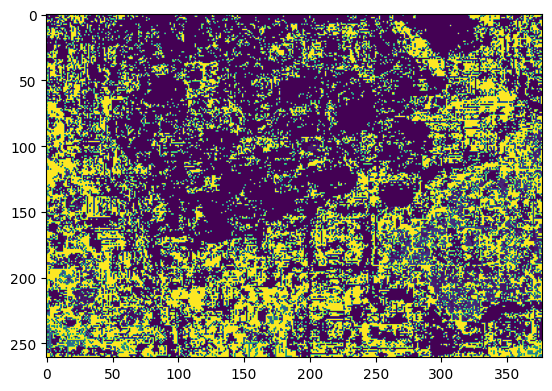

In [ ]:
# 2 level
second_level_clusters = 0


max_cluster = 0
for i in range(-1,max(Y_prediction)):
  temp = img[img['1st_level'] == i]
  db = DBSCAN(eps=2, min_samples=3)
  temp_result = db.fit_predict(temp[['x','y']])
  temp['results'] = temp_result
  if(max_cluster > max(temp_result)):
    max_cluster = max(temp_result)
  print(f"custer {i} with {len(temp_result)} data points sub-cluster into == {max(temp_result)}")
  # for i in range(len(temp_result)):
  #   if(temp_result[i]!=-1):
  #     temp_result[i] = second_level_clusters + temp_result[i]
  # img.loc[temp_result.index , '2nd_level'] = temp_result
  img.loc[temp[temp_result == -1].index, '2nd_level'] = -1
  for j in range(max(temp_result) +1):
      img.loc[temp[temp_result == j].index, '2nd_level'] = second_level_clusters
      second_level_clusters += 1
  second_level_clusters = max(temp_result)+1



print(img)
print("max_cluster=", max_cluster)
print(max(img['2nd_level']))

plt.imshow(np.uint8(np.array(img['2nd_level']).reshape(261,377)))
plt.show()

[35300 50348  2270  1574  1053   849   603   522   396   382   327   266
   272   248   233   185   200   189   177   164   131   117   130   147
   118   108    95    86    86    61    92    85   105    91    93    70
    57    54    56    40    48    43    30    35    31    23    44    18
     9    10    24    15    16    15     5     3     5     3     3     7
     4     4     3     4     3    54     7     4     4     6     3     3
     3     6     6     3     5    13     4    21     4     3     3     4
    28     8     3     3   185    17     5     3     3     3     5     3
     4     3    21    26    10     5    42     6     4     9    17    11
     4     3     3     5     4     5     8]


Text(0, 0.5, 'Count')

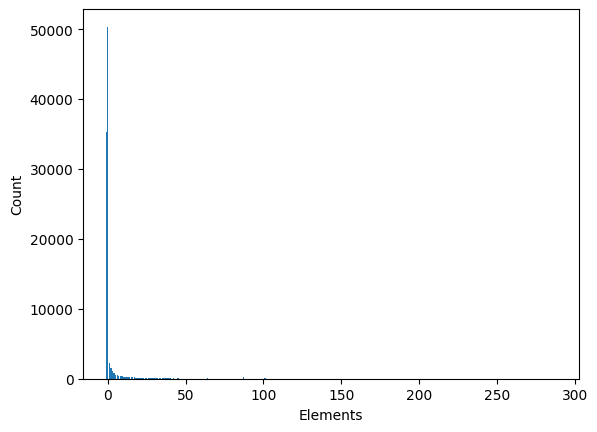

In [ ]:
data = np.array(img['2nd_level'])
unique_elements, counts = np.unique(data, return_counts=True)
print(counts)
plt.bar(unique_elements, counts, align='center')
plt.xlabel('Elements')
plt.ylabel('Count')

## MERGING

In [ ]:
img

0    1    2    x    y  1st_level  scalled_kmeans  kmenas_2nd_level  \
0       30   27   30    0    0         -1               2               NaN   
1       41   35   39    0    1         -1               2               NaN   
2       72   66   68    0    2         -1               2               NaN   
3      124  116  117    0    3         -1               0               NaN   
4      145  135  134    0    4         -1               0               NaN   
...    ...  ...  ...  ...  ...        ...             ...               ...   
98392   34   39   43  260  372         -1               2               NaN   
98393   35   40   44  260  373       2642               2               NaN   
98394   31   36   39  260  374         -1               2               NaN   
98395   31   38   39  260  375         -1               2               NaN   
98396   45   54   52  260  376         -1               2               NaN   

       kmeans_2nd_level  2nd_level  
0                  52.0        0.0  
1                  52.0        0.0  
2                  52.0        0.0  
3                   0.0        0.0  
4                   0.0        0.0  
...                 ...        ...  
98392              97.0      101.0  
98393              97.0       -1.0  
98394              97.0      101.0  
98395              97.0      101.0  
98396              97.0      101.0  

[98397 rows x 10 columns]

In [ ]:
## merging
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['kmeans_2nd_level']))):
  temp = img[img['kmeans_2nd_level'] == i]
  print(i,len(temp))
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))


0 10729
1 84
2 9
3 8
4 50
5 22
6 122
7 68
8 7
9 1488
10 62
11 64
12 10
13 10
14 105
15 14
16 19
17 11
18 91
19 104
20 10
21 14
22 8
23 7
24 8
25 459
26 13
27 119
28 7
29 19
30 66
31 6
32 43
33 87
34 11
35 7
36 20
37 7
38 19
39 10
40 7
41 12
42 7
43 55
44 34
45 9
46 7
47 12
48 21
49 12
50 7
51 16
52 65
53 15
54 45
55 164
56 122
57 42
58 7578
59 43
60 43
61 135
62 101
63 619
64 37
65 141
66 324
67 28
68 23
69 30
70 413
71 43
72 244
73 35
74 9349
75 271
76 208
77 689
78 87
79 80
80 91
81 165
82 26
83 191
84 154
85 24
86 37
87 57
88 24
89 59
90 38
91 490
92 31
93 23
94 390
95 52
96 26
97 17320
98 423
99 25
100 1056
101 35
102 62
103 81
104 48
105 66
106 23
107 99
108 79
109 49
110 599
111 100
112 58
113 14957
114 245
115 435
116 28
117 159
118 714
119 54
120 22
121 129
122 11
123 520
124 142
125 8
126 6
127 74
128 9
129 7
130 7
131 4
132 7
133 32
134 37
135 10
136 34
137 77
138 150
139 9
140 6
141 5
142 17
143 11
144 14
145 10
146 16
147 21
148 18
149 34
150 35
151 14
152 54
153 15
154 8
1

In [ ]:
def check_neighbourhood(img, index,i ,j,threshld):
  cluster_i = img[img[index] == i]
  cluster_i = cluster_i.reset_index()
  cluster_j = img[img[index] == j]
  cluster_j = cluster_j.reset_index()

  count_neighboor = 0
  for i in range(len(cluster_i)):

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]+1 ]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]-1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]+1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]-1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]+1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]+1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]+1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]-1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]-1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]-1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]+1]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

    temp = cluster_j.loc[ cluster_j['x'] == cluster_i['x'][i]-1]
    temp2 = temp.loc[temp['y'] == cluster_i['y'][i]]
    if(len(temp2)>0):
      count_neighboor += len(temp2)

  if(count_neighboor >= threshld):
    return True
  else:
    return False

In [ ]:
no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'kmeans_2nd_level',i ,j,2)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue

Streaming output truncated to the last 5000 lines.
i= 156 j= 165
i= 156 j= 166
i= 156 j= 167
i= 156 j= 168
i= 156 j= 169
i= 156 j= 170
i= 156 j= 172
i= 156 j= 173
i= 156 j= 175
i= 156 j= 176
i= 156 j= 178
i= 156 j= 179
i= 156 j= 180
i= 156 j= 181
i= 156 j= 183
i= 156 j= 187
i= 156 j= 188
i= 156 j= 191
i= 156 j= 193
i= 156 j= 194
i= 156 j= 206
i= 156 j= 208
i= 156 j= 213
i= 156 j= 214
i= 156 j= 219
i= 157 j= 2
i= 157 j= 3
i= 157 j= 4
i= 157 j= 6
i= 157 j= 10
i= 157 j= 11
i= 157 j= 13
i= 157 j= 15
i= 157 j= 17
i= 157 j= 18
i= 157 j= 20
i= 157 j= 21
i= 157 j= 23
i= 157 j= 27
i= 157 j= 30
i= 157 j= 31
i= 157 j= 32
i= 157 j= 33
i= 157 j= 35
i= 157 j= 36
i= 157 j= 39
i= 157 j= 40
i= 157 j= 41
i= 157 j= 43
i= 157 j= 45
i= 157 j= 47
i= 157 j= 48
i= 157 j= 50
i= 157 j= 51
i= 157 j= 54
i= 157 j= 60
i= 157 j= 68
i= 157 j= 69
i= 157 j= 83
i= 157 j= 92
i= 157 j= 102
i= 157 j= 104
i= 157 j= 107
i= 157 j= 112
i= 157 j= 116
i= 157 j= 122
i= 157 j= 128
i= 157 j= 130
i= 157 j= 134
i= 157 j= 135
i= 157 j

In [ ]:
print(merged)

[ 11  24   0   0   0  57   0   8   7  71   0   0  16   0  29   0  12   0
   0  25   0   0  26   0   1  19  22   0   0  14   0   0   0   0  37   0
   0  34   0   0   0   0   0   0  61   0  49   0   0  46   0   0  67  63
   0  66  58   5  56   0   0  44  64  53  62   0  55  52   0   0  79   9
  90   0  77  97  86  74 113  70 126 119 125   0  94   0  76 109   0 140
  72 123   0   0  84 136 103  75   0   0   0 159   0  96   0   0   0   0
 182  87 147   0   0  78   0 118   0 132 115  81 216 141   0  91 127  82
  80 124   0 131   0 129 117   0   0   0  95 254   0   0  89 121   0 259
   0   0 151 110   0   0   0 146   0   0 155 154   0   0   0 101   0 162
 161   0 167   0 172 164   0   0   0   0 166   0   0   0   0   0   0   0
   0   0 108   0   0   0   0   0   0   0   0 193   0 191   0   0 199   0
   0 196   0 203   0 201   0   0   0   0   0   0   0   0   0   0   0   0
 120   0   0   0   0   0   0   0 238   0   0   0   0   0   0 242   0   0
   0   0   0   0 224   0 243   0 231 240   0 246 24

In [ ]:
m1 = merged

In [ ]:
c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print(len(merged)-c)

160


In [ ]:
final_cluster = 0
merged1 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged1[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      print(merged1)
      img.loc[img['2nd_level'] == i, 'merged_cluster'] = final_cluster
      # print(img.loc[img['2nd_kmeans'] == i])
      img.loc[img['2nd_level'] == merged[i], 'merged_cluster'] = final_cluster
      # print(img.loc[img['2nd_kmeans'] == merged[i]])
      merged1[i] = -1
      merged1[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['2nd_level'] == i, 'merged_cluster'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print(max(img['merged_cluster']))


[ 11  24   0   0   0  57   0   8   7  71   0   0  16   0  29   0  12   0
   0  25   0   0  26   0   1  19  22   0   0  14   0   0   0   0  37   0
   0  34   0   0   0   0   0   0  61   0  49   0   0  46   0   0  67  63
   0  66  58   5  56   0   0  44  64  53  62   0  55  52   0   0  79   9
  90   0  77  97  86  74 113  70 126 119 125   0  94   0  76 109   0 140
  72 123   0   0  84 136 103  75   0   0   0 159   0  96   0   0   0   0
 182  87 147   0   0  78   0 118   0 132 115  81 216 141   0  91 127  82
  80 124   0 131   0 129 117   0   0   0  95 254   0   0  89 121   0 259
   0   0 151 110   0   0   0 146   0   0 155 154   0   0   0 101   0 162
 161   0 167   0 172 164   0   0   0   0 166   0   0   0   0   0   0   0
   0   0 108   0   0   0   0   0   0   0   0 193   0 191   0   0 199   0
   0 196   0 203   0 201   0   0   0   0   0   0   0   0   0   0   0   0
 120   0   0   0   0   0   0   0 238   0   0   0   0   0   0 242   0   0
   0   0   0   0 224   0 243   0 231 240   0 246 24

In [ ]:
len(img['merged_cluster'].unique())

89

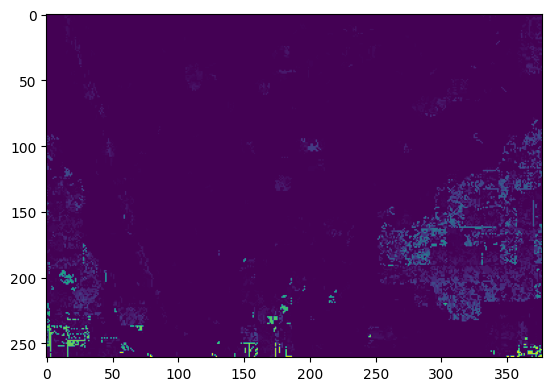

In [ ]:
plt.imshow(np.uint8(np.array(img['merged_cluster']).reshape(261,377)))
plt.show()

87
i= 0 j= 1
merged  0 1
i= 1 j= 2
merged  1 2
i= 3 j= 4
merged  3 4
i= 5 j= 6
merged  5 6
i= 7 j= 8
merged  7 8
i= 9 j= 10
merged  9 10
i= 11 j= 12
merged  11 12
i= 13 j= 14
merged  13 14
i= 15 j= 21
i= 15 j= 26
merged  15 26
i= 16 j= 17
merged  16 17
i= 18 j= 19
merged  18 19
i= 20 j= 21
merged  20 21
i= 22 j= 23
i= 22 j= 24
merged  22 24
i= 23 j= 25
i= 23 j= 27
merged  23 27
i= 25 j= 28
i= 25 j= 29
merged  25 29
i= 28 j= 30
merged  28 30
i= 31 j= 32
merged  31 32
i= 33 j= 34
i= 33 j= 35
i= 33 j= 36
i= 33 j= 37
i= 33 j= 38
i= 33 j= 39
i= 33 j= 40
merged  33 40
i= 34 j= 35
i= 34 j= 36
i= 34 j= 37
i= 34 j= 38
i= 34 j= 39
i= 34 j= 41
i= 34 j= 42
merged  34 42
i= 35 j= 36
i= 35 j= 37
i= 35 j= 38
i= 35 j= 39
i= 35 j= 41
i= 35 j= 43
i= 35 j= 44
i= 35 j= 45
i= 35 j= 47
i= 35 j= 50
i= 35 j= 57
i= 35 j= 67
i= 35 j= 69
i= 35 j= 70
i= 36 j= 35
i= 36 j= 37
i= 36 j= 38
i= 36 j= 39
i= 36 j= 41
i= 36 j= 43
i= 36 j= 44
i= 36 j= 45
i= 36 j= 47
i= 36 j= 50
i= 36 j= 57
i= 36 j= 66
i= 36 j= 67
i= 36 j= 

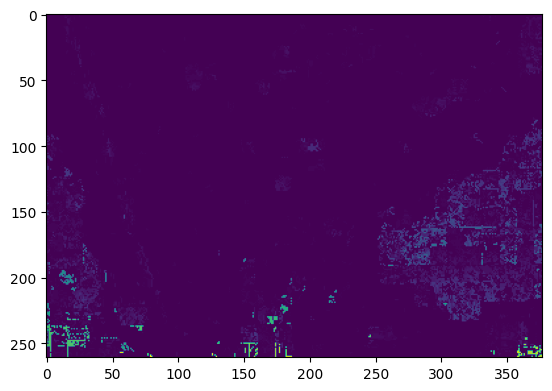

In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster']))):
  temp = img[img['merged_cluster'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster'] == i, 'merged_cluster_2'] = final_cluster
      img.loc[img['merged_cluster'] == merged[i], 'merged_cluster_2'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster'] == i, 'merged_cluster_2'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_2nd merging =", max(img['merged_cluster_2']))

plt.imshow(np.uint8(np.array(img['merged_cluster_2']).reshape(261,377)))
plt.show()


68
i= 0 j= 1
merged  0 1
i= 1 j= 2
merged  1 2
i= 3 j= 4
merged  3 4
i= 5 j= 6
merged  5 6
i= 7 j= 8
merged  7 8
i= 9 j= 10
merged  9 10
i= 11 j= 12
merged  11 12
i= 13 j= 14
merged  13 14
i= 15 j= 16
merged  15 16
i= 17 j= 18
i= 17 j= 19
i= 17 j= 20
i= 17 j= 21
i= 17 j= 22
i= 17 j= 23
i= 17 j= 24
i= 17 j= 25
i= 17 j= 26
i= 17 j= 27
i= 17 j= 29
i= 17 j= 32
i= 17 j= 49
i= 17 j= 51
i= 17 j= 52
i= 18 j= 17
i= 18 j= 19
i= 18 j= 20
i= 18 j= 21
merged  18 21
i= 19 j= 17
i= 19 j= 20
i= 19 j= 22
i= 19 j= 23
i= 19 j= 24
i= 19 j= 25
i= 19 j= 26
i= 19 j= 27
i= 19 j= 29
i= 19 j= 32
i= 19 j= 39
i= 19 j= 49
i= 19 j= 51
i= 19 j= 52
i= 20 j= 17
i= 20 j= 19
i= 20 j= 22
i= 20 j= 23
i= 20 j= 24
i= 20 j= 25
i= 20 j= 26
i= 20 j= 27
i= 20 j= 29
i= 20 j= 32
i= 20 j= 39
i= 20 j= 48
i= 20 j= 49
i= 20 j= 51
i= 20 j= 52
i= 22 j= 17
i= 22 j= 19
i= 22 j= 20
i= 22 j= 23
i= 22 j= 24
i= 22 j= 25
i= 22 j= 26
i= 22 j= 27
i= 22 j= 29
i= 22 j= 32
i= 22 j= 39
i= 22 j= 49
i= 22 j= 51
i= 22 j= 52
i= 23 j= 17
i= 23 j= 19
i= 

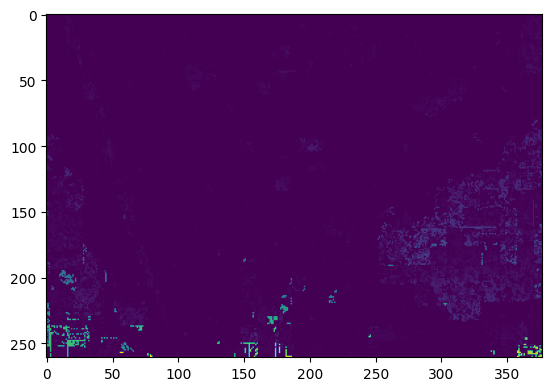

In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_2']))):
  temp = img[img['merged_cluster_2'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_2',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_2'] == i, 'merged_cluster_3'] = final_cluster
      img.loc[img['merged_cluster_2'] == merged[i], 'merged_cluster_3'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_2'] == i, 'merged_cluster_3'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_3rd merging =", max(img['merged_cluster_3']))

plt.imshow(np.uint8(np.array(img['merged_cluster_3']).reshape(261,377)))
plt.show()


58
i= 0 j= 1
merged  0 1
i= 1 j= 2
merged  1 2
i= 3 j= 4
merged  3 4
i= 5 j= 6
merged  5 6
i= 7 j= 8
merged  7 8
i= 9 j= 10
i= 9 j= 11
i= 9 j= 12
i= 9 j= 13
i= 9 j= 14
i= 9 j= 15
i= 9 j= 16
i= 9 j= 17
i= 9 j= 18
i= 9 j= 20
i= 9 j= 23
i= 9 j= 40
i= 9 j= 42
i= 9 j= 43
i= 10 j= 9
i= 10 j= 11
i= 10 j= 12
i= 10 j= 13
i= 10 j= 14
i= 10 j= 15
i= 10 j= 16
i= 10 j= 17
i= 10 j= 18
i= 10 j= 20
i= 10 j= 23
i= 10 j= 40
i= 10 j= 42
i= 10 j= 43
i= 11 j= 9
i= 11 j= 10
i= 11 j= 12
i= 11 j= 13
i= 11 j= 14
i= 11 j= 15
i= 11 j= 16
i= 11 j= 17
i= 11 j= 18
i= 11 j= 20
i= 11 j= 23
i= 11 j= 30
i= 11 j= 40
i= 11 j= 42
i= 11 j= 43
i= 12 j= 9
i= 12 j= 10
i= 12 j= 11
i= 12 j= 13
i= 12 j= 14
i= 12 j= 15
i= 12 j= 16
i= 12 j= 17
i= 12 j= 18
i= 12 j= 20
i= 12 j= 23
i= 12 j= 30
i= 12 j= 39
i= 12 j= 40
i= 12 j= 42
i= 12 j= 43
i= 13 j= 9
i= 13 j= 10
i= 13 j= 11
i= 13 j= 12
i= 13 j= 14
i= 13 j= 15
i= 13 j= 16
i= 13 j= 17
i= 13 j= 18
i= 13 j= 20
i= 13 j= 23
i= 13 j= 30
i= 13 j= 40
i= 13 j= 42
i= 13 j= 43
i= 14 j= 9
i= 14 

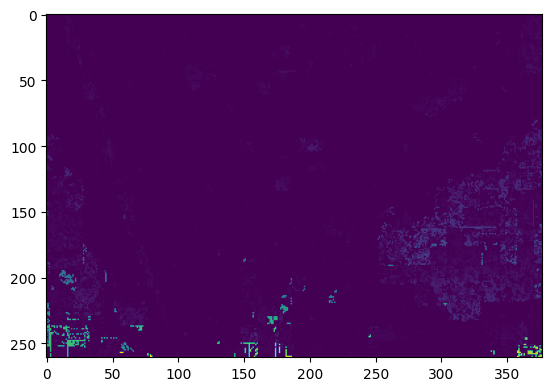

In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_3']))):
  temp = img[img['merged_cluster_3'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_3',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_3'] == i, 'merged_cluster_4'] = final_cluster
      img.loc[img['merged_cluster_3'] == merged[i], 'merged_cluster_4'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_3'] == i, 'merged_cluster_4'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_4th merging =", max(img['merged_cluster_4']))

plt.imshow(np.uint8(np.array(img['merged_cluster_3']).reshape(261,377)))
plt.show()


53
i= 0 j= 1
merged  0 1
i= 1 j= 2
merged  1 2
i= 3 j= 4
merged  3 4
i= 5 j= 6
i= 5 j= 7
i= 5 j= 8
i= 5 j= 9
i= 5 j= 10
i= 5 j= 11
i= 5 j= 12
i= 5 j= 13
i= 5 j= 14
i= 5 j= 16
i= 5 j= 19
i= 5 j= 36
i= 5 j= 38
i= 5 j= 39
i= 6 j= 5
i= 6 j= 7
i= 6 j= 8
i= 6 j= 9
i= 6 j= 10
i= 6 j= 11
i= 6 j= 12
i= 6 j= 13
i= 6 j= 14
i= 6 j= 16
i= 6 j= 19
i= 6 j= 36
i= 6 j= 38
i= 6 j= 39
i= 7 j= 5
i= 7 j= 6
i= 7 j= 8
i= 7 j= 9
i= 7 j= 10
i= 7 j= 11
i= 7 j= 12
i= 7 j= 13
i= 7 j= 14
i= 7 j= 16
i= 7 j= 19
i= 7 j= 26
i= 7 j= 36
i= 7 j= 38
i= 7 j= 39
i= 8 j= 5
i= 8 j= 6
i= 8 j= 7
i= 8 j= 9
i= 8 j= 10
i= 8 j= 11
i= 8 j= 12
i= 8 j= 13
i= 8 j= 14
i= 8 j= 16
i= 8 j= 19
i= 8 j= 26
i= 8 j= 35
i= 8 j= 36
i= 8 j= 38
i= 8 j= 39
i= 9 j= 5
i= 9 j= 6
i= 9 j= 7
i= 9 j= 8
i= 9 j= 10
i= 9 j= 11
i= 9 j= 12
i= 9 j= 13
i= 9 j= 14
i= 9 j= 16
i= 9 j= 19
i= 9 j= 26
i= 9 j= 36
i= 9 j= 38
i= 9 j= 39
i= 10 j= 5
i= 10 j= 6
i= 10 j= 7
i= 10 j= 8
i= 10 j= 9
i= 10 j= 11
i= 10 j= 12
i= 10 j= 13
i= 10 j= 14
i= 10 j= 16
i= 10 j= 19
i= 10 j= 3

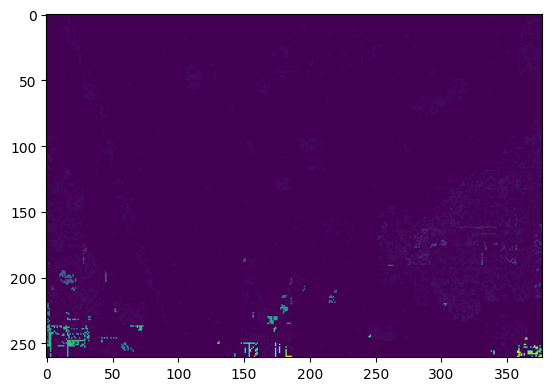

In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_4']))):
  temp = img[img['merged_cluster_4'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_4',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_4'] == i, 'merged_cluster_5'] = final_cluster
      img.loc[img['merged_cluster_4'] == merged[i], 'merged_cluster_5'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_4'] == i, 'merged_cluster_5'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_5th merging =", max(img['merged_cluster_5']))

plt.imshow(np.uint8(np.array(img['merged_cluster_5']).reshape(261,377)))
plt.show()


50
i= 0 j= 1
merged  0 1
i= 1 j= 2
merged  1 2
i= 3 j= 4
i= 3 j= 5
i= 3 j= 6
i= 3 j= 7
i= 3 j= 8
i= 3 j= 9
i= 3 j= 10
i= 3 j= 11
i= 3 j= 12
i= 3 j= 14
i= 3 j= 17
i= 3 j= 34
i= 3 j= 36
i= 3 j= 37
i= 4 j= 3
i= 4 j= 5
i= 4 j= 6
i= 4 j= 7
i= 4 j= 8
i= 4 j= 9
i= 4 j= 10
i= 4 j= 11
i= 4 j= 12
i= 4 j= 14
i= 4 j= 17
i= 4 j= 34
i= 4 j= 36
i= 4 j= 37
i= 5 j= 3
i= 5 j= 4
i= 5 j= 6
i= 5 j= 7
i= 5 j= 8
i= 5 j= 9
i= 5 j= 10
i= 5 j= 11
i= 5 j= 12
i= 5 j= 14
i= 5 j= 17
i= 5 j= 24
i= 5 j= 34
i= 5 j= 36
i= 5 j= 37
i= 6 j= 3
i= 6 j= 4
i= 6 j= 5
i= 6 j= 7
i= 6 j= 8
i= 6 j= 9
i= 6 j= 10
i= 6 j= 11
i= 6 j= 12
i= 6 j= 14
i= 6 j= 17
i= 6 j= 24
i= 6 j= 33
i= 6 j= 34
i= 6 j= 36
i= 6 j= 37
i= 7 j= 3
i= 7 j= 4
i= 7 j= 5
i= 7 j= 6
i= 7 j= 8
i= 7 j= 9
i= 7 j= 10
i= 7 j= 11
i= 7 j= 12
i= 7 j= 14
i= 7 j= 17
i= 7 j= 24
i= 7 j= 34
i= 7 j= 36
i= 7 j= 37
i= 8 j= 3
i= 8 j= 4
i= 8 j= 5
i= 8 j= 6
i= 8 j= 7
i= 8 j= 9
i= 8 j= 10
i= 8 j= 11
i= 8 j= 12
i= 8 j= 14
i= 8 j= 17
i= 8 j= 34
i= 8 j= 36
i= 8 j= 37
i= 9 j= 3
i= 9 j= 4
i

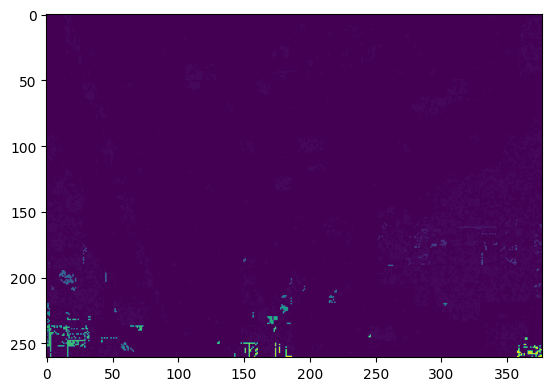

In [ ]:
##applying same merging stratagy again on merged clusters
avr_r=[]
avr_g=[]
avr_b=[]


for i in range(int(max(img['merged_cluster_5']))):
  temp = img[img['merged_cluster_5'] == i]
  temp = temp.reset_index()
  temp_r = temp_g=temp_b =0
  for j in range(len(temp)):
    temp_r += temp[0][j]
    temp_g += temp[1][j]
    temp_b += temp[2][j]

  avr_r.append(temp_r/len(temp))
  avr_g.append(temp_g/len(temp))
  avr_b.append(temp_b/len(temp))



no_clusters = len(avr_r)
rgb_thrasold = 30**2
merged = np.zeros(no_clusters, dtype = int)
print(len(merged))
for i in range(no_clusters):
  for j in range(no_clusters):
    if(i!=j and merged[i] == 0 and merged[j] == 0 and (avr_r[i]- avr_r[j])**2 <= rgb_thrasold and (avr_g[i]-avr_g[j])**2 <=rgb_thrasold and (avr_b[i]-avr_b[j])**2 <=rgb_thrasold):
      print("i=",i, "j=",j)
      if(check_neighbourhood(img, 'merged_cluster_5',i ,j,4)):
        print("merged ", i ,j)
        merged[i] = j
        merged[j] = i
        continue
  continue



c =0
for i in range(len(merged)):
  if merged[i] != 0:
    c+=1
print("no_clusters_without_merging", len(merged)-c)

m2 = merged


final_cluster = 0
merged2 = np.zeros(no_clusters, dtype = int)
print(merged)
i=0
while(i<len(merged)):
  if( merged2[i] != -1):
    if(merged[i] != 0):
      print(i , merged[i])
      # print(merged1)
      img.loc[img['merged_cluster_5'] == i, 'merged_cluster_6'] = final_cluster
      img.loc[img['merged_cluster_5'] == merged[i], 'merged_cluster_6'] = final_cluster

      merged2[i] = -1
      merged2[merged[i]] = -1
      final_cluster += 1
    else:
      img.loc[img['merged_cluster_5'] == i, 'merged_cluster_6'] = final_cluster
      final_cluster += 1
    i+=1
  else:
    i+=1
print("no_pf_cluster_after_6th merging =", max(img['merged_cluster_6']))

plt.imshow(np.uint8(np.array(img['merged_cluster_6']).reshape(261,377)))
plt.show()


### As we can see that the cluster are not merging after some iteration which shows that the cluster count is optimized. In the specific image we have considered R, G and B along with X,Y cordinate for clustering .